# F20DL Group 17 ML Portfolio

# Imports
Imports needed for our portfolio project. Placed at the top, for ease of keeping track of them.

In [1]:
# installing required libraries for our portfolio

import sys
assert sys.version_info >= (3,5)    # Python >= 3.5 is required

In [2]:
# !{sys.executable} -m pip install scikit-learn
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pydotplus

In [3]:
import sklearn
assert sklearn.__version__ >= "0.2"

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [4]:
# Changing the categorical data to numbers.
from sklearn.preprocessing import OrdinalEncoder


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import preprocessing

# Logistic regression to the training data
from sklearn.linear_model import LogisticRegression

# Creates the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier


In [7]:
from sklearn import feature_selection as fs


In [8]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Week 1
Overview: We shortlisted datasets to work on for the rest of the semester.

## The short-listed tabular datasets were...
1. **Pokémon for Data Mining and Machine Learning** - [Kaggle](https://www.kaggle.com/datasets/alopez247/pokemon)
    - <font color='#90ee90'> 721 entries and 23 attributes for each entry, a mix of nominal and numerical data. </font>
    - <font color='#90ee90'> There are only 2 attributes with over 50% null values, can be easily cleaned
    and still lots of other attributes </font>
    - <font color='#90ee90'> The dataset is 732Kb, so it does not use a lot of space. </font>
   <br></br>
2. **Netflix Movies and TV Shows** - [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)
    - <font color='#90ee90'> Pros:  8807 records with 12 attributes covering all data types (nominal/interval/ratio/ordinal data)</font>
    - <font color='#90ee90'> The dataset is 3.4MB.</font>
    - <font color='#FF7F7F'> 30% of records have null values for a certain attribute - field can be removed or records can be removed (leaving 6000 records) </font>
    <br></br>
3. **Video Game Sales** - [Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales)
    - <font color='#90ee90'>The dataset is comprehensive which consist of 16500+ records</font>
    - <font color='#90ee90'>This is a well known dataset with lots of papers and code</font>
    - <font color='#FF7F7F'>Has a limited number of attributes</font>

## The short-listed computer vision datasets were...

4. **Fruits 360** - [Kaggle](https://www.kaggle.com/datasets/moltean/fruits)
    - <font color='#90ee90'>The dataset is comprehensive which consist of 90000+ high-quality images of over 100 different classes</font>
    - <font color='#90ee90'>The dataset consist of good quality, bad quality, and mixed quality fruit images</font>
    - <font color='#90ee90'>This is a well known dataset with lots of papers and code</font>
    - <font color='#90ee90'>The dataset has lots of training data which might result in better accuracy</font>
    - <font color='#FF7F7F'>The data might require GPUs for training due to the sheer size of the dataset</font>
    <br></br>
5. **Pokemon Image Dataset** - [Kaggle](https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types)
    - <font color='#90ee90'>Has images of *all* of the Pokemon from generation 1 to 7</font>
    - <font color='#90ee90'>810 files/images to identify next evolution from the pre-evoled forms of the current Pokemon</font>
    - <font color='#90ee90'>Each Pokemon has two types, primary and secondary. The dataset helps predict the current type of the Pokemon image</font>
    - <font color='#FF7F7F'>Only 3 columns in the dataset, Pokemon, Type1, Type2</font>
    - <font color='#FF7F7F'>Type 2 has 50% null values, meaning half the Pokemons only have type1 which makes the identification pointless</font>
    - <font color='#FF7F7F'>Data is not uniform, the image resolutions are different which can result in conflicts during data analysis</font>


## The datasets we ultimately selected were...
1. **Pokémon for Data Mining and Machine Learning** - [Kaggle](https://www.kaggle.com/datasets/alopez247/pokemon)
    - For nominal analysis
2. **Fruits 360** - [Kaggle](https://www.kaggle.com/datasets/moltean/fruits)
    - For any CNN related tasks.

# Week 2
Overview: We investigated the pokemon data by visualising and summarizing, in order to be aquainted with it.

## 1. We loaded the dataset, described the attributes, and generated summary statistics.

In [9]:
# Loading the CSV onto a data frame
pokemon = pd.read_csv('pokemon_alopez247.csv')
# This displays the top 5 entries, showing its 23 attributes
pokemon.head()

Number        Name Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  \
0       1   Bulbasaur  Grass  Poison    318  45      49       49      65   
1       2     Ivysaur  Grass  Poison    405  60      62       63      80   
2       3    Venusaur  Grass  Poison    525  80      82       83     100   
3       4  Charmander   Fire     NaN    309  39      52       43      60   
4       5  Charmeleon   Fire     NaN    405  58      64       58      80   

   Sp_Def  ...  Color  hasGender  Pr_Male Egg_Group_1  Egg_Group_2  \
0      65  ...  Green       True    0.875     Monster        Grass   
1      80  ...  Green       True    0.875     Monster        Grass   
2     100  ...  Green       True    0.875     Monster        Grass   
3      50  ...    Red       True    0.875     Monster       Dragon   
4      65  ...    Red       True    0.875     Monster       Dragon   

   hasMegaEvolution Height_m Weight_kg  Catch_Rate      Body_Style  
0             False     0.71       6.9          45       quadruped  
1             False     0.99      13.0          45       quadruped  
2              True     2.01     100.0          45       quadruped  
3             False     0.61       8.5          45  bipedal_tailed  
4             False     1.09      19.0          45  bipedal_tailed  

[5 rows x 23 columns]

### Attribute Description of the Dataset

This database includes 721 Pokémon records (from first six generations), with 23 attributes.



- **Number**: Unique identifier.
- **Name**: Pokémon name.
- **Type_1**: Primary type.
- **Type_2**: Second type, in case the Pokémon has it.
- **Total**: Sum of base stats (health points, attack, defense, special attack, special defense, and speed).
- **HP**: Base health points.
- **Attack**: Base attack.
- **Defense**: Base defense.
- **Sp_Atk**: Base special attack.
- **Sp_Def**: Base special defense.
- **Speed**: Base speed.
- **Generation**: Generation when the Pokémon was introduced. Ranges from 1 to 6.
- **isLegendary**: Boolean that indicates whether the Pokémon is Legendary or not.
- **Color**: Color of the Pokémon.
- **hasGender**: Boolean that indicates if the Pokémon can be classified as female or male.
- **Pr_male**: If the Pokémon has gender, the probability of being male. The probability of being female is 1 minus this value.
- **EggGroup1**: Egg group of the Pokémon.
- **EggGroup2**: Second egg group of the Pokémon, if it has two.
- **hasMegaEvolution**: If the Pokémon is able to Mega-evolve or not. Boolean value.
- **Height_m**: Pokémon height (m)
- **Weight_kg**: Pokémon weight (kg)
- **Catch_Rate**: Probability of the Pokémon being caught when a Pokéball is thrown at it.
- **Body_Style**: Body style of the Pokémon. E.g., Quadruped.

In [10]:
# Displays the feature name, data type and number of nulls.
# Note: Almost half of "Type_2" attributes are null, because Type 2 is not a required attribute is an optional add-on. 
pokemon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [11]:
# Generated summary statistics for the numerical attributes of the dataset
# It is not a complete dataset becuase there are some null values, which is to be dealt with in the next step.
pokemon.describe()

Number       Total          HP      Attack     Defense      Sp_Atk  \
count  721.00000  721.000000  721.000000  721.000000  721.000000  721.000000   
mean   361.00000  417.945908   68.380028   75.013870   70.808599   68.737864   
std    208.27906  109.663671   25.848272   28.984475   29.296558   28.788005   
min      1.00000  180.000000    1.000000    5.000000    5.000000   10.000000   
25%    181.00000  320.000000   50.000000   53.000000   50.000000   45.000000   
50%    361.00000  424.000000   65.000000   74.000000   65.000000   65.000000   
75%    541.00000  499.000000   80.000000   95.000000   85.000000   90.000000   
max    721.00000  720.000000  255.000000  165.000000  230.000000  154.000000   

           Sp_Def       Speed  Generation     Pr_Male    Height_m   Weight_kg  \
count  721.000000  721.000000  721.000000  644.000000  721.000000  721.000000   
mean    69.291262   65.714286    3.323162    0.553377    1.144979   56.773370   
std     27.015860   27.277920    1.669873    0.199969    1.044369   89.095667   
min     20.000000    5.000000    1.000000    0.000000    0.100000    0.100000   
25%     50.000000   45.000000    2.000000    0.500000    0.610000    9.400000   
50%     65.000000   65.000000    3.000000    0.500000    0.990000   28.000000   
75%     85.000000   85.000000    5.000000    0.500000    1.400000   61.000000   
max    230.000000  160.000000    6.000000    1.000000   14.500000  950.000000   

       Catch_Rate  
count  721.000000  
mean   100.246879  
std     76.573513  
min      3.000000  
25%     45.000000  
50%     65.000000  
75%    180.000000  
max    255.000000

<AxesSubplot:>

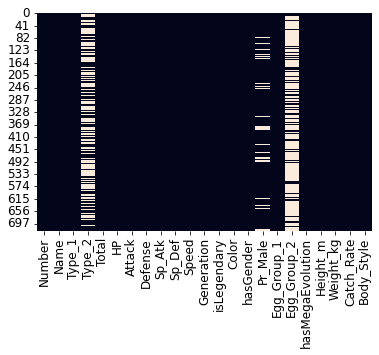

In [12]:
# Indicates where the null values are, within the dataset.
sns.heatmap(pokemon.isnull(), cbar=False)

## 2. Dealt with null values
We replaced the null values with another arbitrary value as they are meaningful.

Attributes will nulls and why they have nulls:

1. *Type_2* has around 50% null values as some Pokemons do not have a second type. Removing all the rows with this as null would reduce our dataset to 50% of the size. Removing this column ends the possibility of identifying and analysising the Pokemon's second type. Replacing this as a string called "None" solves our problem.

2. *Egg_Group_2* has around 75% null value as some Pokemons have only one egg group. Removing all the rows with this as null would reduce our dataset to 25% of the size. Removing this column again ends the possibility of indentifying and analysising the Pokemon's second egg group. Replacing this as a string called "None" solves our problem.

3. *Pr_Male* has around 11% null values, these Pokemons do not have a gender. Removing these rows or columns will cost us the possibility of identifying and predicting the Pokemon's gender. Replacing this with 999 signifies as the Pokemon as genderless.

In [13]:

# Replacing null values of Type_2 to string "None"
pokemon['Type_2'].fillna("None", inplace = True)
# Replacing null values of Egg_Group_2 to string "None"
pokemon['Egg_Group_2'].fillna("None", inplace = True)
# Replacing null values of Pr_Male to 999
pokemon['Pr_Male'].fillna(999, inplace = True)

# Now there are no more null values.
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            721 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           721 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

## 3. Visualising again, now with a complete dataset
Generated a box plot of the numerical features of our dataset.

<AxesSubplot:>

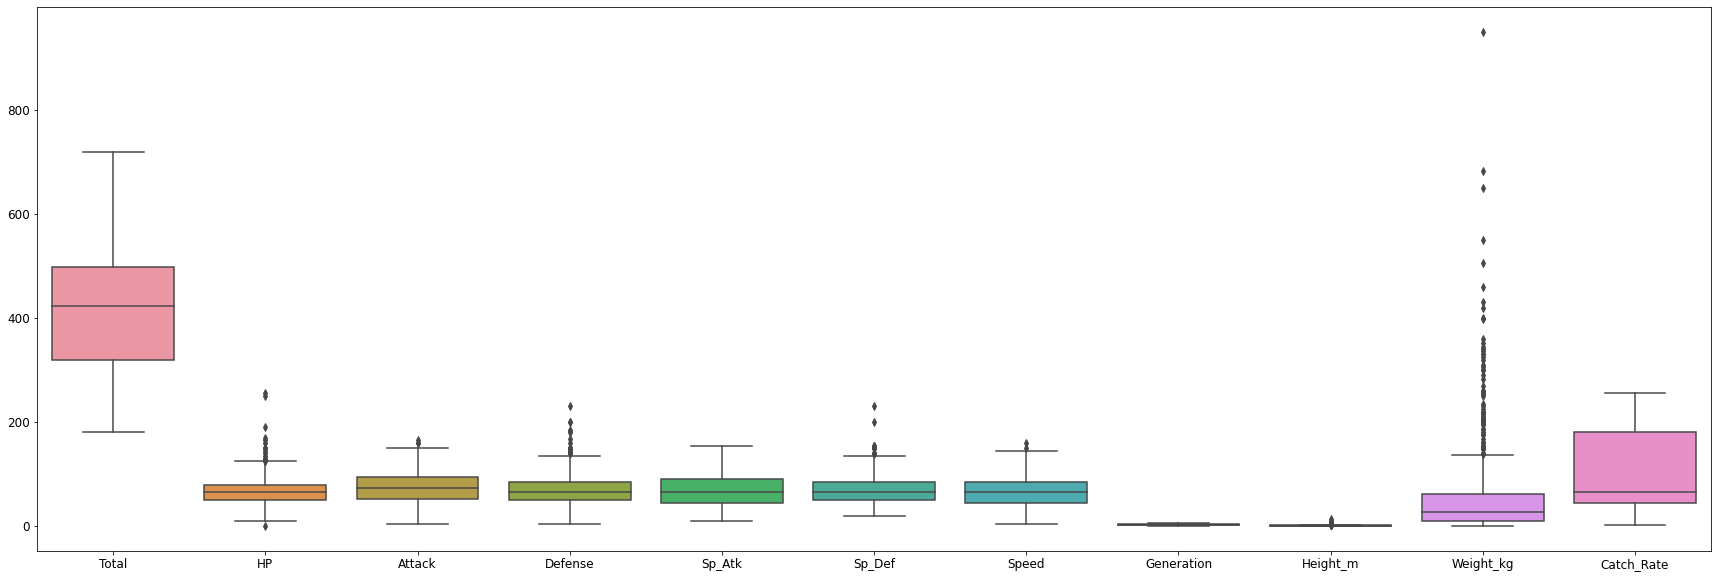

In [14]:
# Generating a box plot to view the numerical data

plt.figure(figsize = (30, 10))
# Taking all numerical data to plot
num_data = pokemon[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Height_m', 'Weight_kg', 'Catch_Rate']]
# Generating a box plot to visualize the statistical summary 
sns.boxplot(data = num_data)

## 4. Dealing with Categorical Data
We encoded the categorical data.


In [15]:
# Selecting the categorical features of the pokemon dataset
categorical_attributes = ['Type_1', 'Type_2', 'Egg_Group_1', 'Egg_Group_2', 'Color', 'Body_Style', 'isLegendary', 'hasMegaEvolution', 'hasGender']
print(pokemon[categorical_attributes].head())

  Type_1  Type_2 Egg_Group_1 Egg_Group_2  Color      Body_Style  isLegendary  \
0  Grass  Poison     Monster       Grass  Green       quadruped        False   
1  Grass  Poison     Monster       Grass  Green       quadruped        False   
2  Grass  Poison     Monster       Grass  Green       quadruped        False   
3   Fire    None     Monster      Dragon    Red  bipedal_tailed        False   
4   Fire    None     Monster      Dragon    Red  bipedal_tailed        False   

   hasMegaEvolution  hasGender  
0             False       True  
1             False       True  
2              True       True  
3             False       True  
4             False       True  


In [16]:

enc = OrdinalEncoder()
pokemonCategorical = pokemon[categorical_attributes] = enc.fit_transform(pokemon[categorical_attributes]).astype(int)
print(pokemonCategorical)

[[ 9 14 10 ...  0  0  1]
 [ 9 14 10 ...  0  0  1]
 [ 9 14 10 ...  0  1  1]
 ...
 [15  4 11 ...  1  1  0]
 [14  8 11 ...  1  0  0]
 [ 6 18 11 ...  1  0  0]]


In [17]:
# Now they are all numerical
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    int32  
 3   Type_2            721 non-null    int32  
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    int32  
 13  Color             721 non-null    int32  
 14  hasGender         721 non-null    int32  
 15  Pr_Male           721 non-null    float64
 16  Egg_Group_1       721 non-null    int32  
 1

In [18]:
# Now the categorical features are numerically encoded
pokemon[categorical_attributes].head()

Type_1  Type_2  Egg_Group_1  Egg_Group_2  Color  Body_Style  isLegendary  \
0       9      14           10            6      3           9            0   
1       9      14           10            6      3           9            0   
2       9      14           10            6      3           9            0   
3       6      12           10            2      7           0            0   
4       6      12           10            2      7           0            0   

   hasMegaEvolution  hasGender  
0                 0          1  
1                 0          1  
2                 1          1  
3                 0          1  
4                 0          1

## 5. Dropping Unecessary Features
Removed number and name features becuase they will not help in classification.

In [19]:
# Number and name are unnecessary because they will not help us classify the target attributes
pokemon = pokemon.drop(['Number','Name'], axis=1)
pokemon_x = pokemon.drop(['isLegendary'], axis=1)
pokemon_y = pokemon['isLegendary']
pokemon.head()

Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  Sp_Def  Speed  \
0       9      14    318  45      49       49      65      65     45   
1       9      14    405  60      62       63      80      80     60   
2       9      14    525  80      82       83     100     100     80   
3       6      12    309  39      52       43      60      50     65   
4       6      12    405  58      64       58      80      65     80   

   Generation  ...  Color  hasGender  Pr_Male  Egg_Group_1  Egg_Group_2  \
0           1  ...      3          1    0.875           10            6   
1           1  ...      3          1    0.875           10            6   
2           1  ...      3          1    0.875           10            6   
3           1  ...      7          1    0.875           10            2   
4           1  ...      7          1    0.875           10            2   

   hasMegaEvolution  Height_m  Weight_kg  Catch_Rate  Body_Style  
0                 0      0.71        6.9          45           9  
1                 0      0.99       13.0          45           9  
2                 1      2.01      100.0          45           9  
3                 0      0.61        8.5          45           0  
4                 0      1.09       19.0          45           0  

[5 rows x 21 columns]

## 6. Plotting the Correlation Matrix
We want to see the correlation between each attributes.

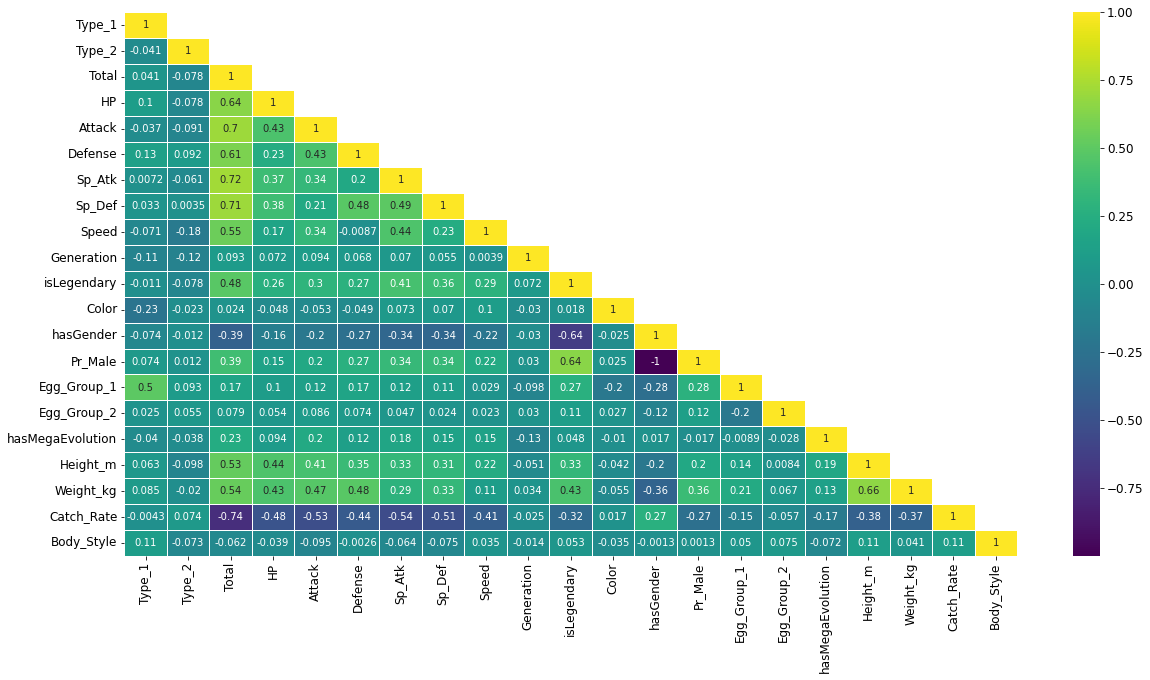

In [20]:
# We want to look at the correlations between each attribute

mask = np.array(pokemon.corr())
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
corr_plot = sns.heatmap(pokemon.corr(), mask = mask, annot=True, cmap='viridis', linewidths=.5)

# Week 3:
Overview: Experimented with multiple feature extraction methods and ran a binary classifier on the the resulting datasets.

## 1. Created a binary classification function

In [21]:
# Our binary classification function

def binary_classification(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
    
    ss_train_test = StandardScaler()
    lr = LogisticRegression()
    lr.fit(ss_train_test.fit_transform(X_train), y_train)
    
    # Predicting based off of the test data
    predictions = lr.predict(ss_train_test.fit_transform(X_test))

    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

    # print('True Positive(TP)  = ', TP)
    # print('False Positive(FP) = ', FP)
    # print('True Negative(TN)  = ', TN)
    # print('False Negative(FN) = ', FN)

    # Accuracy of the classifier
    accuracy =  (TP + TN) / (TP + FP + TN + FN)

    print('Accuracy: {:0.3f}'.format(accuracy))

    return predictions, y_test

In [22]:
#Tried min max scaler instead of standard Scaler :
#Min max scaler got a lower answer, and had more false trues, than the StandardScaler..

## 2. Tried binary classification on original data (without feature extraction)


In [23]:
y_preds, y_true = binary_classification(pokemon.drop(['isLegendary'], axis=1), pokemon['isLegendary'])

Accuracy: 0.986


## 3. Looked at the correlation of each attribute with the target class *isLegendary*
Using Pearson's R

In [24]:
# Computes the standard correlation coefficient (Pearson’s r) with the isLegendary feature

corr_matrix = pokemon.corr()
top_corr = corr_matrix["isLegendary"]
top_corr = abs(top_corr).sort_values(ascending=False).drop('isLegendary')
top_corr

Pr_Male             0.644736
hasGender           0.644714
Total               0.481837
Weight_kg           0.425219
Sp_Atk              0.409739
Sp_Def              0.360215
Height_m            0.326323
Catch_Rate          0.319302
Attack              0.302786
Speed               0.286082
Defense             0.274446
Egg_Group_1         0.271078
HP                  0.258926
Egg_Group_2         0.111683
Type_2              0.078308
Generation          0.071875
Body_Style          0.052852
hasMegaEvolution    0.047955
Color               0.018150
Type_1              0.010503
Name: isLegendary, dtype: float64

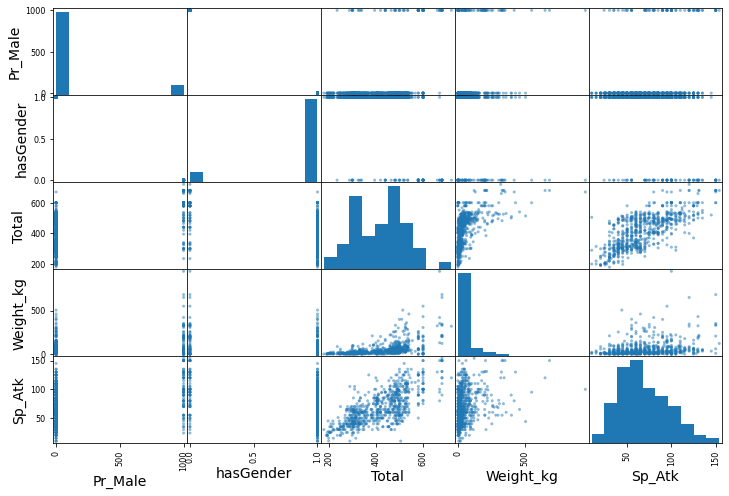

In [25]:
# Visualising the top 5 correlating attributes
attributes = top_corr.index[:5].tolist()
top_5 = scatter_matrix(pokemon[attributes], figsize=(12, 8))

## 4. Created 3 datasets consisting of the top 2, 5, and 10 correlating features respectively 

In [26]:
# Creating datasets using the top 2, 5, and 10 features 
pearsons_r_d1 = pokemon_x[top_corr.index[:2].tolist()]
pearsons_r_d2 = pokemon_x[top_corr.index[:5].tolist()]
pearsons_r_d3 = pokemon_x[top_corr.index[:10].tolist()]

print(pearsons_r_d1.columns.to_list())
print(pearsons_r_d2.columns.to_list())
print(pearsons_r_d3.columns.to_list())

['Pr_Male', 'hasGender']
['Pr_Male', 'hasGender', 'Total', 'Weight_kg', 'Sp_Atk']
['Pr_Male', 'hasGender', 'Total', 'Weight_kg', 'Sp_Atk', 'Sp_Def', 'Height_m', 'Catch_Rate', 'Attack', 'Speed']


We also ran the classifier on dataset containing the top 1, 2, 3, …, 20 correlating attributes based on Pearson’s R. Using this we wanted to find out what the optimal number of attributes to use is, for higher accuracy.

In [27]:
# Checking to when the accuracy plateaus to know what the optimal number of features are.
for x in range(1,21):
    print("Using the top " + str(x) + " features: ")
    binary_classification(pokemon_x[top_corr.index[:x].tolist()],pokemon_y)

Using the top 1 features: 
Accuracy: 0.935
Using the top 2 features: 
Accuracy: 0.935
Using the top 3 features: 
Accuracy: 0.986
Using the top 4 features: 
Accuracy: 0.986
Using the top 5 features: 
Accuracy: 0.977
Using the top 6 features: 
Accuracy: 0.982
Using the top 7 features: 
Accuracy: 0.977
Using the top 8 features: 
Accuracy: 0.986
Using the top 9 features: 
Accuracy: 0.986
Using the top 10 features: 
Accuracy: 0.986
Using the top 11 features: 
Accuracy: 0.986
Using the top 12 features: 
Accuracy: 0.986
Using the top 13 features: 
Accuracy: 0.986
Using the top 14 features: 
Accuracy: 0.986
Using the top 15 features: 
Accuracy: 0.986
Using the top 16 features: 
Accuracy: 0.986
Using the top 17 features: 
Accuracy: 0.986
Using the top 18 features: 
Accuracy: 0.986
Using the top 19 features: 
Accuracy: 0.986
Using the top 20 features: 
Accuracy: 0.986


## 4. Tried an alternative feature extraction method: Embedded Methods
Using this method, we extracted 3 attributes. Running the classifier on this obtained an accuracy of 0.986

In [28]:
X_train_embedded, X_test_embedded, y_train_embedded, y_test_embedded = train_test_split(pokemon_x, pokemon_y, test_size=0.3, random_state=10)

In [29]:
# train model using lasso
lasso = linear_model.Lasso()
lasso.fit(X_train_embedded, y_train_embedded)

# perform feature selection
pokemon_embedded_methods = [feature for feature, weight in zip(pokemon_x.columns.values, lasso.coef_) if weight != 0]
print("Features that have been selected are: ",pokemon_embedded_methods)
em_prediction, em_y_test = binary_classification(pokemon[pokemon_embedded_methods], pokemon_y)

Features that have been selected are:  ['Total', 'Pr_Male', 'Weight_kg']
Accuracy: 0.986


## 5. Tried an alternative feature extraction method: Mutual Information
Ran a decision tree classifier on a dataset containing the top 5 features and achieved an accuracy of 0.988. 

In [30]:
# preparing data for mutual information

Data = preprocessing.MinMaxScaler().fit_transform(pokemon_x)
target = preprocessing.LabelEncoder().fit_transform(pokemon_y)

In [31]:
# The code below returns the indices of the 5 features that have the highest mutual information value
num_features = 5
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mutual_info.fit_transform(Data, target)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = pokemon.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['Total', 'Weight_kg', 'Pr_Male', 'hasGender', 'Color'],
      dtype=object)

In [32]:
# Gives the scores of the values we got before
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.19826112, 0.1756749 , 0.16894466, 0.13827393, 0.11257454])

In [33]:
# Function to plot a graph to plot the feature selection and show correspondance to different feature selection methods

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances for legendary')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

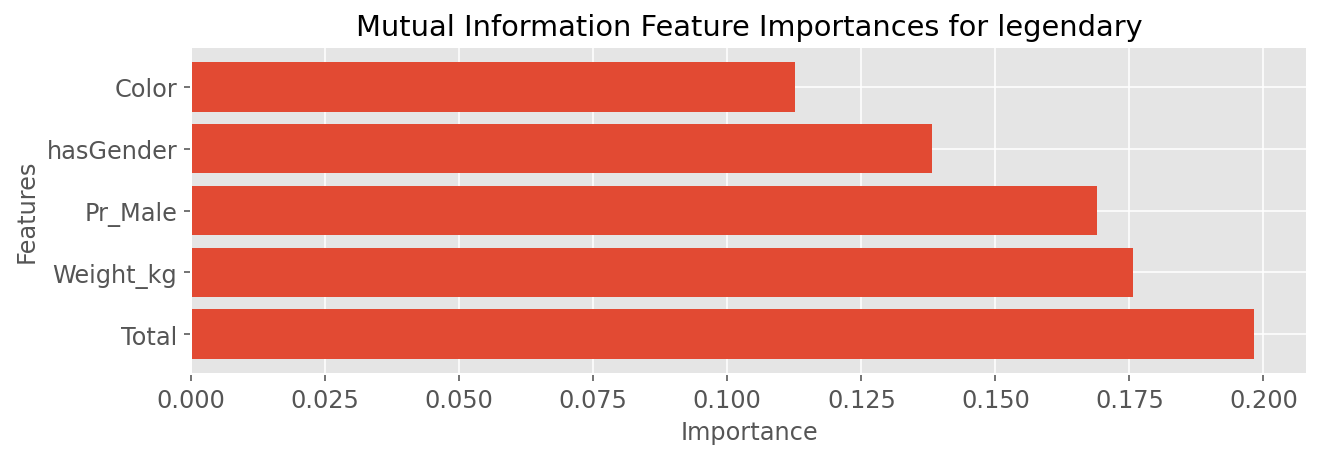

In [34]:
plt.figure(figsize = (10, 3))
plot_imp(best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information')

In [35]:
# A method used during validation where we use stratified 5-fold cross-validation with 3 repetitions and set the random state to 999
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)
# Specifies scoring metric
scoring_metric = 'accuracy'

In [36]:
# Uses the decision tree classifier with default values.
clf = DecisionTreeClassifier(random_state=999)

In [37]:
# Evaluate the performance of these 5 features for mutual Information
cv_results_mutual_info = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_mutual_info],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_mutual_info.mean().round(3)

0.988

## 6. Tried an alternative feature extraction method: Chi Squared
Ran binary classification on the dataset containing the top 2, 5, and 10 correlating attributes based on Chi and obtained accuracies of 0.968, 0.982, and 0.982 respectively

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

for x in [2, 5, 10]:
    X_chi = SelectKBest(chi2, k = x)
    X_kbest = X_chi.fit_transform(pokemon_x, pokemon_y)
    mask = X_chi.get_support()
    new_features = pokemon_x.columns[mask]
    print('Original number of features:', pokemon_x.shape)
    print('Reduced number of features:', X_kbest.shape)
    print('Features reduced to:', new_features.str.cat(sep=", "))
    chi_prediciton, chi_y_test = binary_classification(X_kbest, pokemon_y)
    print("------------")

Original number of features: (721, 20)
Reduced number of features: (721, 2)
Features reduced to: Pr_Male, Weight_kg
Accuracy: 0.968
------------
Original number of features: (721, 20)
Reduced number of features: (721, 5)
Features reduced to: Total, Sp_Atk, Pr_Male, Weight_kg, Catch_Rate
Accuracy: 0.982
------------
Original number of features: (721, 20)
Reduced number of features: (721, 10)
Features reduced to: Total, HP, Attack, Defense, Sp_Atk, Sp_Def, Speed, Pr_Male, Weight_kg, Catch_Rate
Accuracy: 0.982
------------


# Week 4 
Ran classifiers on the dataset and recorded the common performance metrics

## 1. Plotting the ROC curve 
For the logistic regression and decision tree classifiers.

In [39]:
X = pokemon.drop(['isLegendary'], axis=1)
y = pokemon['isLegendary']

# Split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

# Creating objects for classifier and training the classifier with the train split of the dataset
clf_tree = DecisionTreeClassifier()
# Setting max iteration super high to fix converging too fast
clf_reg = LogisticRegression(max_iter=1200000)

clf_tree.fit(X_train, y_train)
clf_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1200000)

In [40]:
# Using the models on test dataset
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]

In [41]:
# Creating False and True Positive Rates
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

In [42]:
# Printing Scores
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

roc_auc_score for DecisionTree:  0.9423857868020303
roc_auc_score for Logistic Regression:  0.9883248730964467


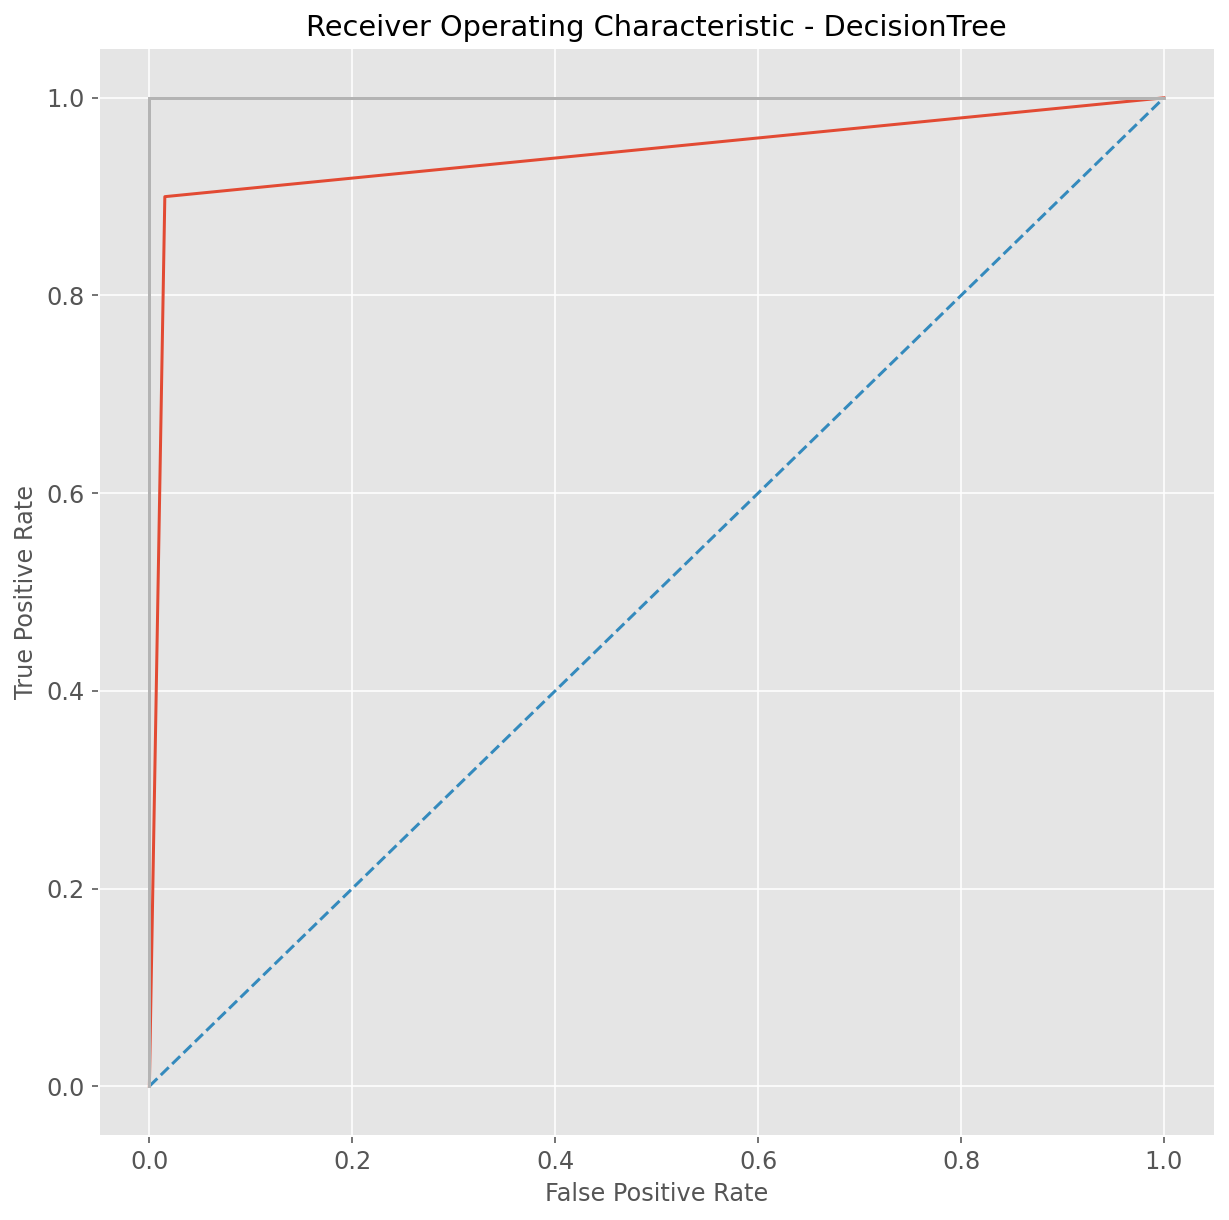

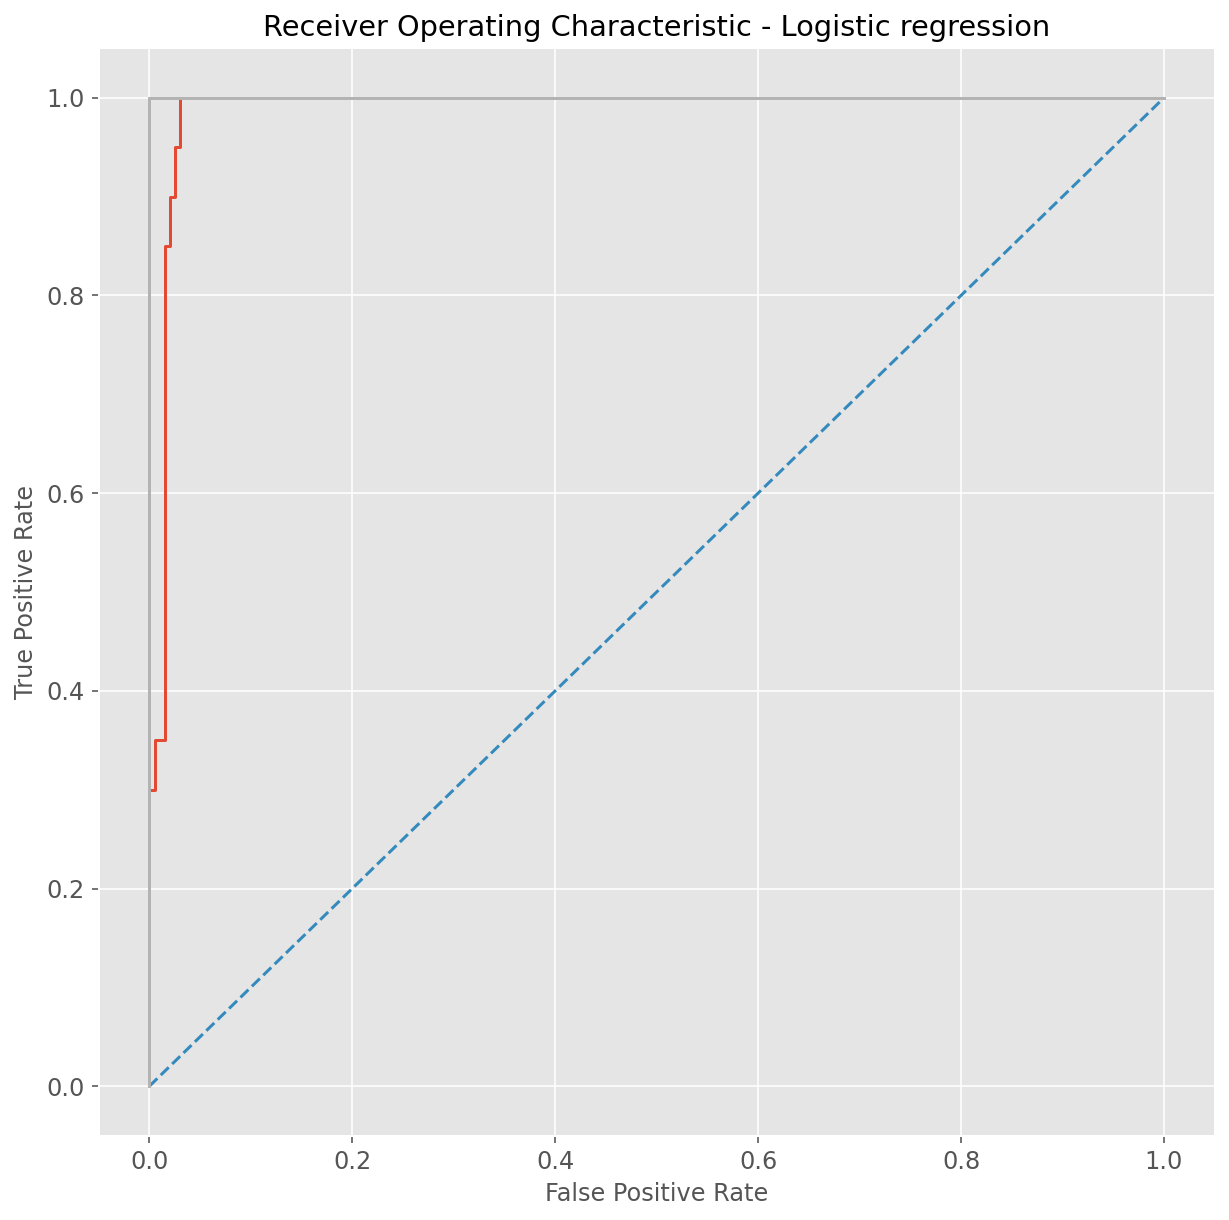

In [43]:
# Ploting ROC Curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
# creating the confusion matrix
predictions, y_test = binary_classification(pokemon_x,pokemon_y)
confusion = confusion_matrix(y_test, predictions)
print(confusion)

Accuracy: 0.986
[[202   3]
 [  0  12]]


In [45]:
def plot_matrix(conf_matrix):
    ax = sns.heatmap(conf_matrix, annot=True, cmap='Reds')

    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted isLengendary')
    ax.set_ylabel('Actual Legendary Category');

    # ticket labels - list must be in numerical order
    ax.xaxis.set_ticklabels(['Not Legendary','Legendary'])
    ax.yaxis.set_ticklabels(['Not Legendary','Legendary'])

    # display the visualization of the Confusion Matrix.
    plt.show()

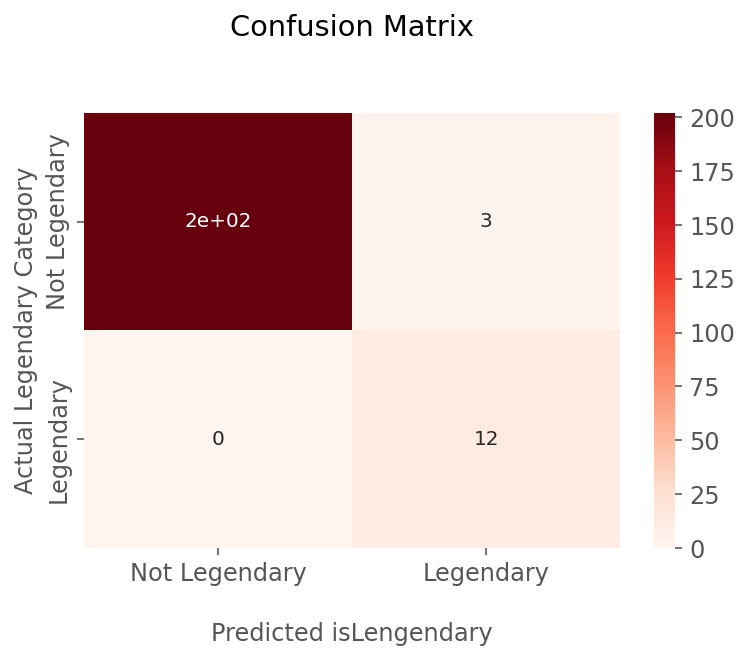

In [46]:
plot_matrix(confusion)

## 2. Plotted the ROC curve for multiclass data 

m:\Anaconda\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
m:\Anaconda\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


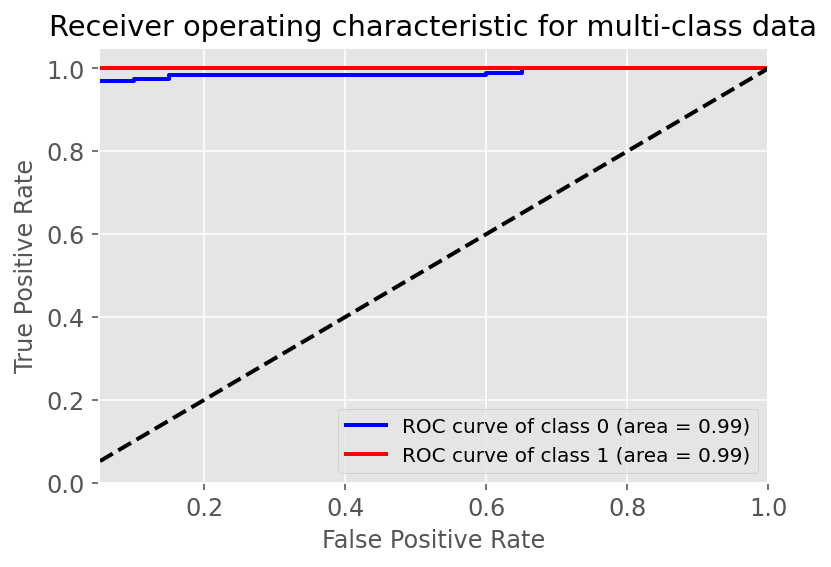

In [47]:
# importing the classifiers
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import svm
from itertools import cycle

# separating the target attributes and the rest of the data
X = pokemon.drop(['isLegendary'], axis=1)
y = pokemon['isLegendary']

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# # splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red'])
for i, color in zip(range(n_classes-1), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
...
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

## 3. Recorded the major performance metrics
And analysed them

In [48]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

def evalMetrics(y_test,predictions,name):
    #importing accuracy_score, precision_score, recall_score, f1_score
    print(name)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, predictions, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, predictions, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, predictions, average='weighted')))

In [49]:
y_preds, y_true = binary_classification(pearsons_r_d2, pokemon_y)
evalMetrics(y_preds, y_true, "Pearsons R: ")
print('\nClassification Report\n')
print(classification_report(y_preds, y_true, target_names=['is Legendary','not Legendary']))

Accuracy: 0.977
Pearsons R: 
Accuracy: 0.98
Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.98

Classification Report

               precision    recall  f1-score   support

 is Legendary       0.99      0.99      0.99       204
not Legendary       0.83      0.77      0.80        13

     accuracy                           0.98       217
    macro avg       0.91      0.88      0.89       217
 weighted avg       0.98      0.98      0.98       217



### Record Of Major Metrics

- ROC: In the ROC graph 1.0 represents perfect classifier and the further we are from the random classifier the better our results are. Over here we can see that the ROC curve of class 1 which is "True" has the higher accuracy. The AUC for decisionTree is 94% while logistic Regression is 98%
- Accuracy: Our total accuracy is 98%, calculated by (all correct / all)
- Precision: Our precision for weighted is 98% but out precision for macro is 91% which is significantly lower than weighted, calculated by (true positives / predicted positives)
- Recal: Our recal for weighted is 98% but our macro is only 88% which is significantly lower than weighted, calculated by (true positives / all actual positives)
- F1 Score: F1 score of weighted was 98% but for macro it was only 89% becasue of the pression and recal being low for macro

- F1 score is reliable as a metric for our dataset while accuracy is not.

# Week 5
Overview: Ran several variations of Bayes Nets classifier and recorded major metrics for each

- Accuracy
- TP, FP, TN, FN
- Sensitivity
- Specificity
- Precision
- Recall
- AUC

In [50]:
# helper function:
def calculate_metrics(matrix,y_test,predicted,msg):
    # Using the method evalMetric function defined in Week 3 to calculate accuracy, precision, recall, and f-1
    
    evalMetrics(y_test, predicted, msg)
    
    # Print the TP, TN, FP, FN
    TP = matrix[0,0]
    FN = matrix[0,1]
    FP = matrix[1,0]
    TN = matrix[1,1]

    print("TP: " + str(TP))
    print("FN: " + str(FN))
    print("FP: " + str(FP))
    print("TN: " + str(TN))

    # Calculating the specificity = TN/(TN+TP)
    specificity = TN/(TN+TP)
    print("Specificity: " + str(specificity))

    # Calculating the sensitivity = TP/(TP+FN)
    sensitivity = TP/(TP+FN)
    print("Sensitivity: " + str(sensitivity))

    # calculating the AUC
    fpr, tpr, threshold = roc_curve(y_test, predicted)
    mul_auc = auc(fpr, tpr)
    print("The AUC is: " + str(mul_auc))

In [51]:
#Splitting up the data, it will be used for all of the Naive Bayes:
X_train, X_test, y_train, y_test = train_test_split(pokemon_x, pokemon_y, test_size=0.33, shuffle=True)

## 1. Using Multinomial Naive Bayes

Anoter example of the Naives Bayes Classifier. The data is assumed to be generated from a simple multinomial distribution. This predicts the probablity of observing counts.

In [52]:
# to convert the content of each string into a vector of numbers
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
multinomial_predicted = model.predict(X_test)

multinomial_accuracy = accuracy_score(y_test, multinomial_predicted)
print("Accuracy after using Multinomial Naive Bayes", round(multinomial_accuracy * 100, 2), "%")

Accuracy after using Multinomial Naive Bayes 93.7 %


### Plotting the Confusion Matrix

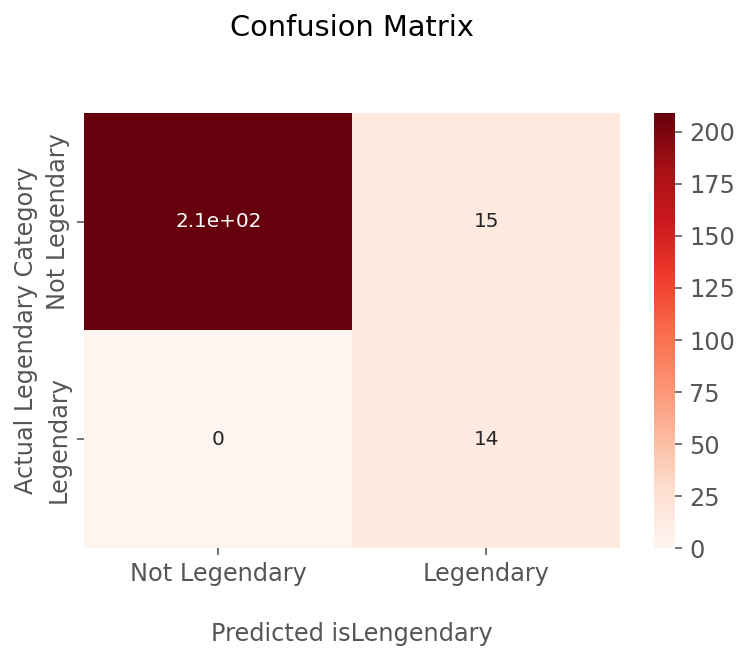

In [53]:
# Plotting the confusion matrix
multinomial_matrix = confusion_matrix(y_test, multinomial_predicted)
plot_matrix(multinomial_matrix)

### Calculating the Metrics

In [54]:
calculate_metrics(multinomial_matrix,y_test,multinomial_predicted,"Multinomial Naive Bayes Performance Metrics: ")

Multinomial Naive Bayes Performance Metrics: 
Accuracy: 0.94
Weighted Precision: 0.97
Weighted Recall: 0.94
Weighted F1-score: 0.95
TP: 209
FN: 15
FP: 0
TN: 14
Specificity: 0.06278026905829596
Sensitivity: 0.9330357142857143
The AUC is: 0.9665178571428572


## 2. Using Gaussian Naive Bayes

In [55]:
# Training the model on the training data:
from sklearn.naive_bayes import GaussianNB
g_model = GaussianNB()
g_model.fit(X_train,y_train)
g_predicted = g_model.predict(X_test)

In [56]:
#Getting accuracy:
g_accuracy = g_model.score(X_test,y_test)
print("Accuracy of Gaussian Naive Bayes", g_accuracy)

Accuracy of Gaussian Naive Bayes 0.9915966386554622


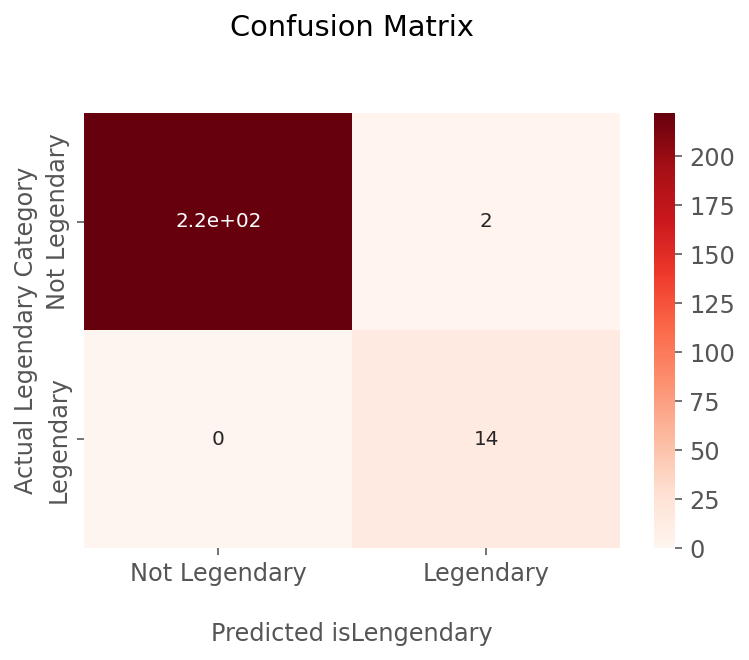

In [57]:
g_matrix = confusion_matrix(y_test, g_predicted)
plot_matrix(g_matrix)

In [58]:
calculate_metrics(g_matrix,y_test,g_predicted,"Gaussian Naive Bayes Performance Metrics: ")

Gaussian Naive Bayes Performance Metrics: 
Accuracy: 0.99
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 222
FN: 2
FP: 0
TN: 14
Specificity: 0.059322033898305086
Sensitivity: 0.9910714285714286
The AUC is: 0.9955357142857143


## 3. Using Complement Naive Bayes

A variant of the Naive Bayes classifier.
This variant works better with imbalanced datasets, which the Pokemon dataset is since there are more non legendary pokemon than legendary pokemon.
Compared to normal Naive Bayes, it calculates the likelihood that the selected feature occurs in other classes annd picks the lowest probability. 


In [59]:
# Import required modules
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import ComplementNB

# Creating and training the Complement Naive Bayes Classifier
classifier = ComplementNB()
classifier.fit(X_train, y_train)
  
# Evaluating the classifier
c_prediction = classifier.predict(X_test)
prediction_train = classifier.predict(X_train)

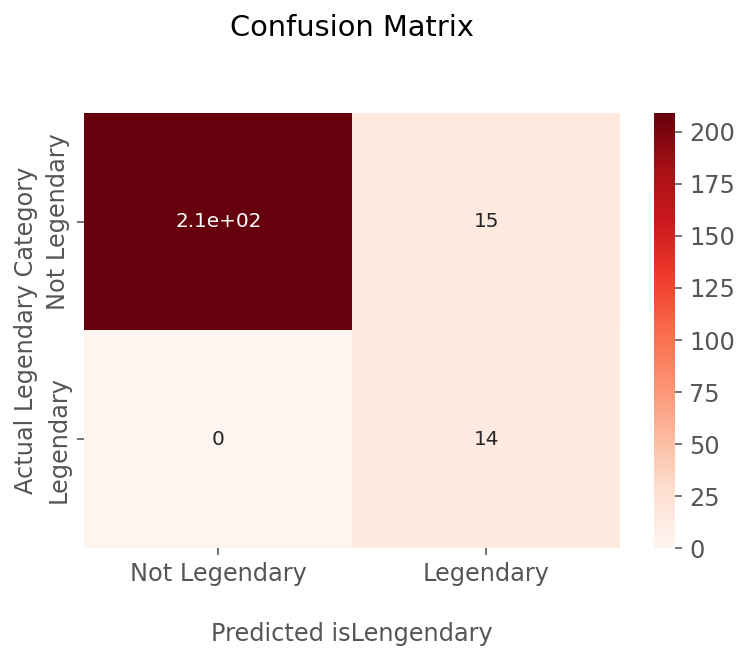

In [60]:
##Plotting the confusion matrix
matrixC = confusion_matrix(y_test, c_prediction)
plot_matrix(matrixC)

In [61]:
calculate_metrics(matrixC,y_test,c_prediction,"Complement Naive Bayes Performance Metrics: ")

Complement Naive Bayes Performance Metrics: 
Accuracy: 0.94
Weighted Precision: 0.97
Weighted Recall: 0.94
Weighted F1-score: 0.95
TP: 209
FN: 15
FP: 0
TN: 14
Specificity: 0.06278026905829596
Sensitivity: 0.9330357142857143
The AUC is: 0.9665178571428572


## 4. Using Bernoulli Naive Bayes

A variant of the Naive Bayes classifier.
The data is assumed to be binary, otherwise the data is binarized.
The target class must be binary, which it is, so this classifier is applicable.


In [62]:
# importing required packages
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

### Running the Bernoulli Naive Bayes Classifier
Note: The optimal parameter for the BernoulliNaive Bayes classifier was found to be 1.1, so that was the final chosen value of the parameter.

In [63]:
# Running the classifier
# Looping for different values of binarize to find the optimal value

binarizeThreshold = 0
while(binarizeThreshold <= 1):
    BernNB = BernoulliNB(binarize = binarizeThreshold)
    binarizeThreshold = round(binarizeThreshold + 0.1, 1)
    BernNB.fit(X_train, y_train)
    y_expect = y_test
    y_pred = BernNB.predict(X_test)
    print("Threshold for binarizing: " + str(binarizeThreshold) + ", accuracy: " + str(accuracy_score(y_expect,y_pred)))


Threshold for binarizing: 0.1, accuracy: 0.9495798319327731
Threshold for binarizing: 0.2, accuracy: 0.9453781512605042
Threshold for binarizing: 0.3, accuracy: 0.9495798319327731
Threshold for binarizing: 0.4, accuracy: 0.9495798319327731
Threshold for binarizing: 0.5, accuracy: 0.9495798319327731
Threshold for binarizing: 0.6, accuracy: 0.9453781512605042
Threshold for binarizing: 0.7, accuracy: 0.9453781512605042
Threshold for binarizing: 0.8, accuracy: 0.9453781512605042
Threshold for binarizing: 0.9, accuracy: 0.9411764705882353
Threshold for binarizing: 1.0, accuracy: 0.9369747899159664
Threshold for binarizing: 1.1, accuracy: 0.9663865546218487


### Performance Evaluation of the Bernoulli Naive Bayes Classifier
Computed the performance of the algorithm using the common performance metrics, which listed below the Week 5 section header.

#### Plotting the confusion matrix of the classifier

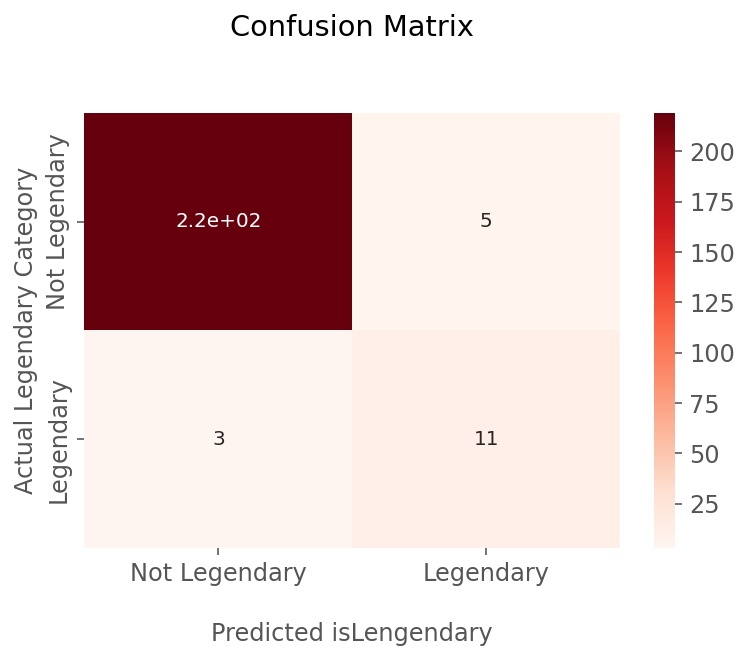

In [64]:
# Plotting the confusion matrix
Bern_matrix = confusion_matrix(y_expect, y_pred)
plot_matrix(Bern_matrix)

#### Calculating the major metrics

In [65]:
calculate_metrics(Bern_matrix,y_expect,y_pred,"Bernoulli Naive Bayes Performance Metrics: ")

Bernoulli Naive Bayes Performance Metrics: 
Accuracy: 0.97
Weighted Precision: 0.97
Weighted Recall: 0.97
Weighted F1-score: 0.97
TP: 219
FN: 5
FP: 3
TN: 11
Specificity: 0.04782608695652174
Sensitivity: 0.9776785714285714
The AUC is: 0.8816964285714285


## 5. Using Categorical Naive Bayes

In [66]:
print(pokemonCategorical)
from sklearn.naive_bayes import CategoricalNB


# Separating the features from the target class
XCat = pokemon[categorical_attributes].drop('isLegendary', axis=1) 
yCat = pokemon['isLegendary']
print(XCat.head())


[[ 9 14 10 ...  0  0  1]
 [ 9 14 10 ...  0  0  1]
 [ 9 14 10 ...  0  1  1]
 ...
 [15  4 11 ...  1  1  0]
 [14  8 11 ...  1  0  0]
 [ 6 18 11 ...  1  0  0]]
   Type_1  Type_2  Egg_Group_1  Egg_Group_2  Color  Body_Style  \
0       9      14           10            6      3           9   
1       9      14           10            6      3           9   
2       9      14           10            6      3           9   
3       6      12           10            2      7           0   
4       6      12           10            2      7           0   

   hasMegaEvolution  hasGender  
0                 0          1  
1                 0          1  
2                 1          1  
3                 0          1  
4                 0          1  


In [67]:

from sklearn.model_selection import train_test_split

X_trainCat, X_testCat, y_trainCat, y_testCat = train_test_split(XCat, yCat, test_size = 0.5, stratify=yCat)
#clf = CategoricalNB(min_categories=int(min_categories=pokemon['isLegendary'].nunique()))
clf = CategoricalNB()
clf.fit(X_trainCat, y_trainCat)
# X_testCat
# X_test2 = X_test2[1:,1:]
y_predCat = clf.predict(X_testCat)
#print(np.array(y_test2).reshape(-1, 1))
#accuracy = clf.score(np.array(y_testCat).reshape(1, -1), y_predCat)
#accuracy = clf.score(y_testCat, y_predCat)
accuracy_score(y_testCat, y_predCat)

#print("Accuracy after using Multinomial Naive Bayes", round(accuracy * 100, 2), "%")

0.9529085872576177

In [68]:
cat_matrix = confusion_matrix(y_testCat, y_predCat)
calculate_metrics(cat_matrix, y_testCat, y_predCat, "Categorical Naive Bayes:")

Categorical Naive Bayes:
Accuracy: 0.95
Weighted Precision: 0.97
Weighted Recall: 0.95
Weighted F1-score: 0.96
TP: 324
FN: 14
FP: 3
TN: 20
Specificity: 0.05813953488372093
Sensitivity: 0.9585798816568047
The AUC is: 0.9140725495240545


## 6. Using Complex Bayes Nets

## 7. Conclusions: Comparison of the methods 

# Week 6

### Gaussian Mixture Models

# Week 7

## 1. Running KMeans Clustering on our Pokemon dataset

### Standardizing the data

In [69]:
# Standardising the data, so that features contribute equal weight
scaler = StandardScaler()

scaler.fit(pokemon)
scaled_pokemon_data_with_target = scaler.transform(pokemon)
# print(scaled_pokemon_data_with_target)

### Running the KMeans on the dataset

Here we are fitting the pokemon data (including the target class isLegendary) to the KMeans algorithm. 
The number of clusters has been chosen according to the Elbow Algorithm, which is 3.


In [70]:
from sklearn.cluster import KMeans
# applying the Kmeans algorithm
kmeans = KMeans(n_clusters=3)
# Running on the data with the target class.
kmeans.fit(scaled_pokemon_data_with_target)

KMeans(n_clusters=3)

Below are the clusters each of the 721 pokemon records has been assigned to.

In [71]:
# Attaching the cluster labels to the pokemon dataset
# kmeans.labels_

### To be able to plot the data into a 2 dimensional space, we must reduce the number of features into 2.
This is done here using Principle Component Analysis

In [72]:
# applying PCA
from sklearn.decomposition import PCA
# reducing it into 2 components.
pca = PCA(n_components=2)
# fitting the scaled data into PCA algorithm
pca.fit(scaled_pokemon_data_with_target)
pokemon_pca = pca.transform(scaled_pokemon_data_with_target)

#### Dimensions have reduced from 21 to 2

In [73]:
print(scaled_pokemon_data_with_target.shape)
print(pokemon_pca.shape)

(721, 21)
(721, 2)


### Visualising the PCA features - the ground truth

The graph below represents the ground truth.
The data points are color coded according to isLegendary class. 


They are not of spherical shape, so clustering does not seem like a helpful algorithm for this data.


[]

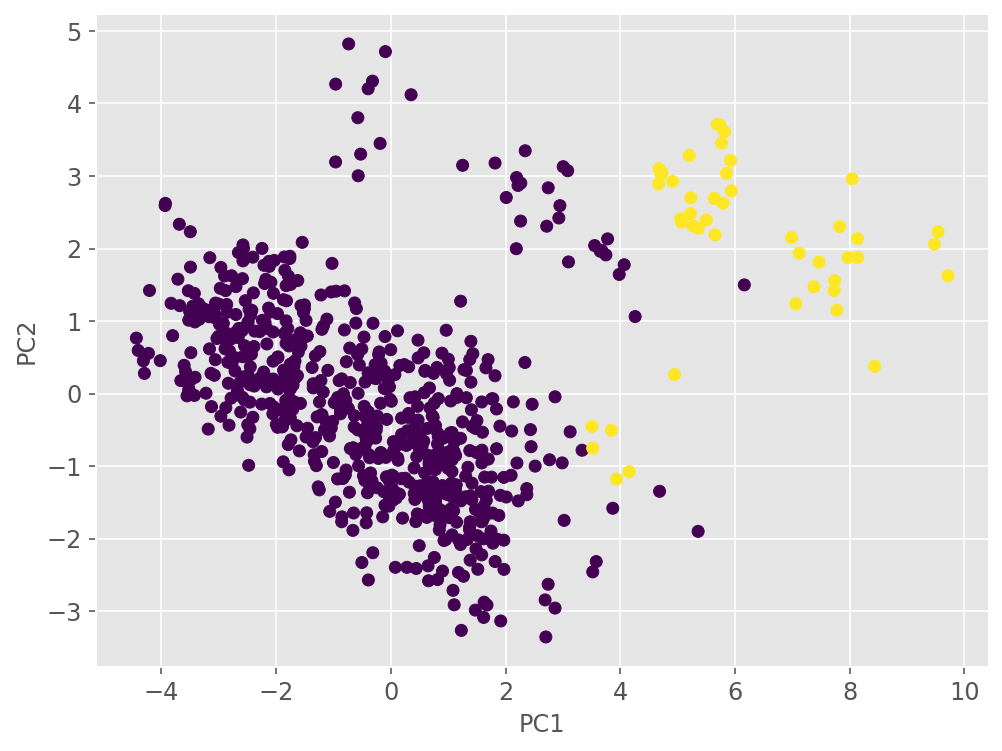

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=pokemon['isLegendary'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.plot()

### Visualising the results from KMeans Clustering

Each color represents the cluster the pokemon has been assigned to.

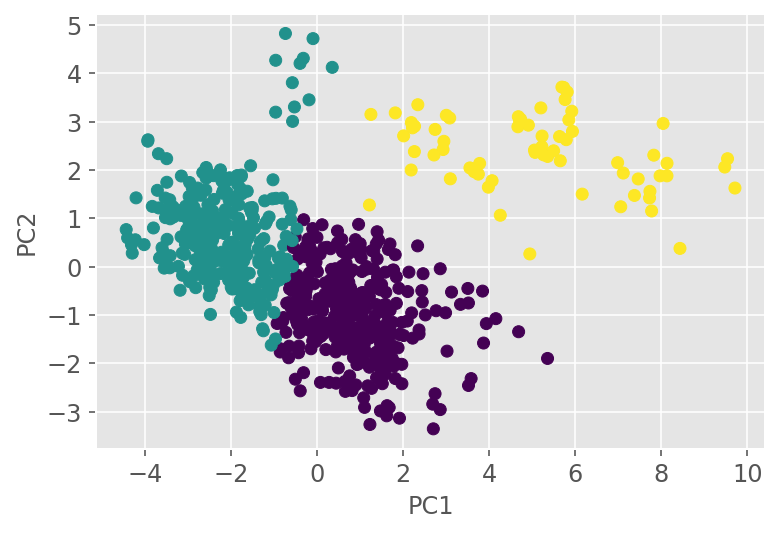

In [75]:
# Visualising the results of clustering.
plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 2. K-means Clustering

Using pearsons r to get the top two correlating features and plotting them for clustering.

In [76]:
print(pearsons_r_d1.shape)

(721, 2)


### Evaluating the clusters

## 3. Expectation Maximization Clustering

The K-means approach is an example of a hard assignment clustering, where each point can belong to only one cluster. Expectation-Maximization algorithm is a way to generalize the approach to consider the soft assignment of points to clusters so that each point has a probability of belonging to each cluster.

The EM algorithm is an iterative approach that cycles between two modes. The first mode attempts to estimate the missing or latent variables, called the estimation-step or E-step. The second mode attempts to optimize the parameters of the model to best explain the data, called the maximization-step or M-step.

- E-Step. Estimate the missing variables in the dataset.
- M-Step. Maximize the parameters of the model in the presence of the data.

The EM algorithm can be applied quite widely, although is perhaps most well known in machine learning for use in unsupervised learning problems, such as density estimation and clustering.

Perhaps the most discussed application of the EM algorithm is for clustering with a mixture model.

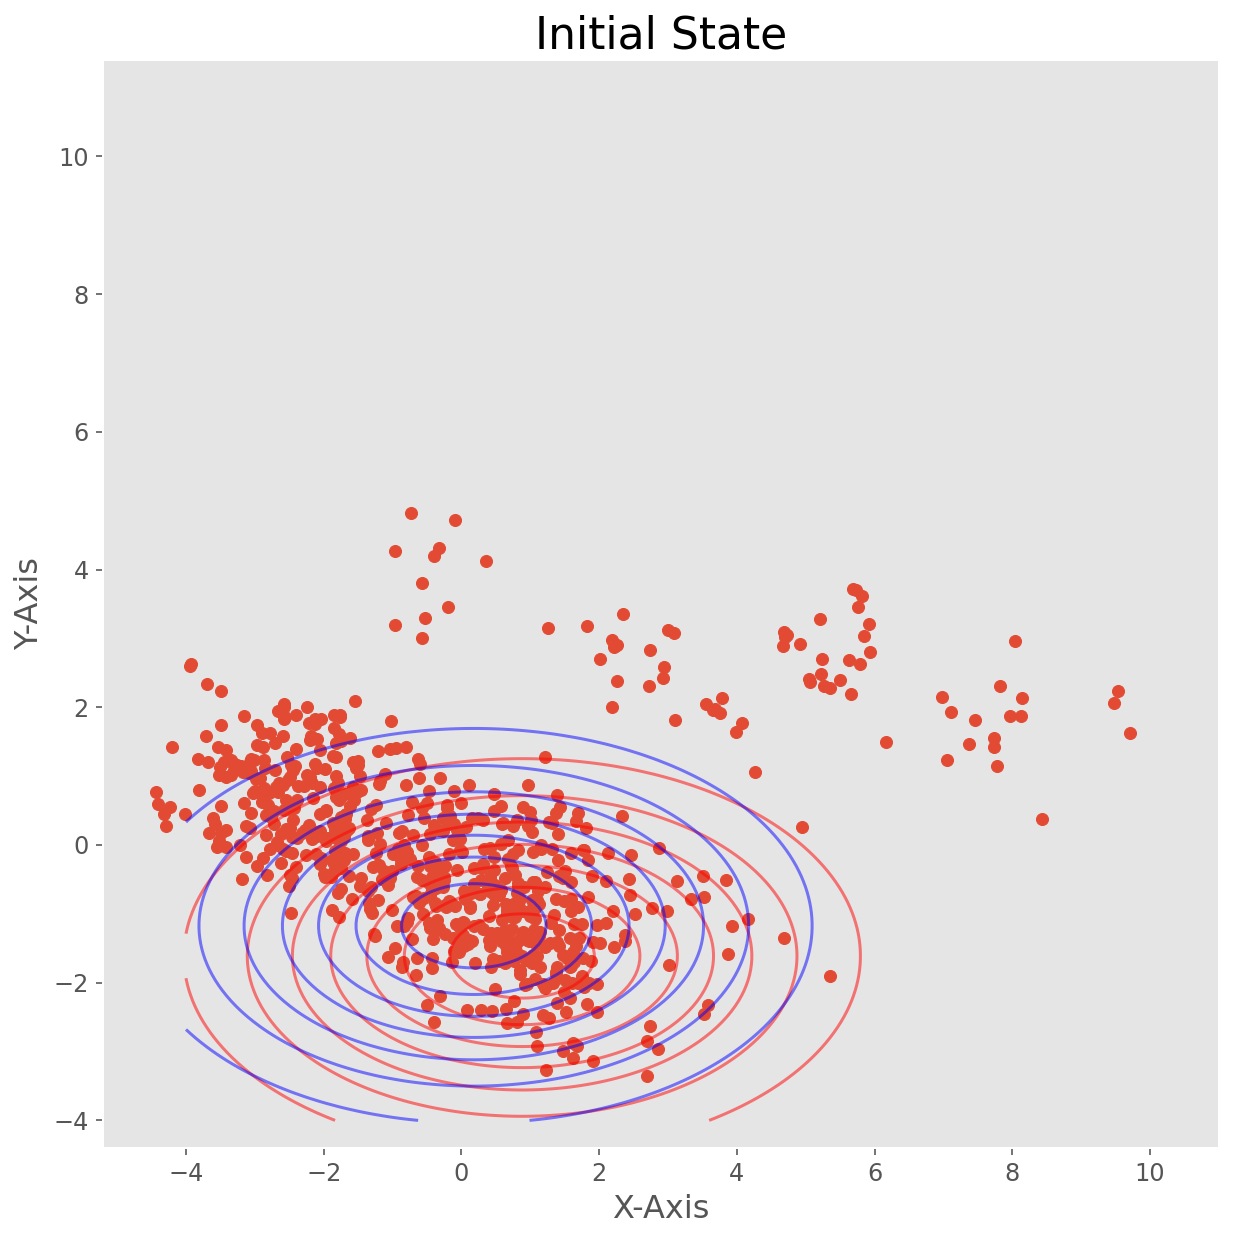

In [77]:
# fit model, test
import random
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

m1 = random.choice(pokemon_pca)
m2 = random.choice(pokemon_pca)
cov1 = np.cov(np.transpose(pokemon_pca))
cov2 = np.cov(np.transpose(pokemon_pca))
pi = 0.5

x1 = np.linspace(-4,11,200)
x2 = np.linspace(-4,11,200)
X, Y = np.meshgrid(x1,x2)

Z1 = multivariate_normal(m1, cov1)
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y

plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], marker='o')
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5)
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5)
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Initial State', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()

#### Expectation step

In [78]:
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]

    pt2 = multivariate_normal.pdf(pokemon_pca, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(pokemon_pca, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    return(eval1)

#### Maximization step

In [79]:
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(pokemon_pca)):
        num_mu1 += (1-eval1[i]) * pokemon_pca[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * pokemon_pca[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(pokemon_pca)):

        q1 = np.matrix(pokemon_pca[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(pokemon_pca[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(pokemon_pca)

    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

#### Function to plot the EM algorithm

In [80]:
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    s1=lis1[2]
    s2=lis1[3]
    Z1 = multivariate_normal(mu1, s1)
    Z2 = multivariate_normal(mu2, s2)

    pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y

    plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
    plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], marker='o')
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5)
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5)
    plt.axis('equal')                                                                  # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
    plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
    plt.grid()                                                                         # displaying gridlines
    plt.show()

#### Calling the functions and repeating until it converges

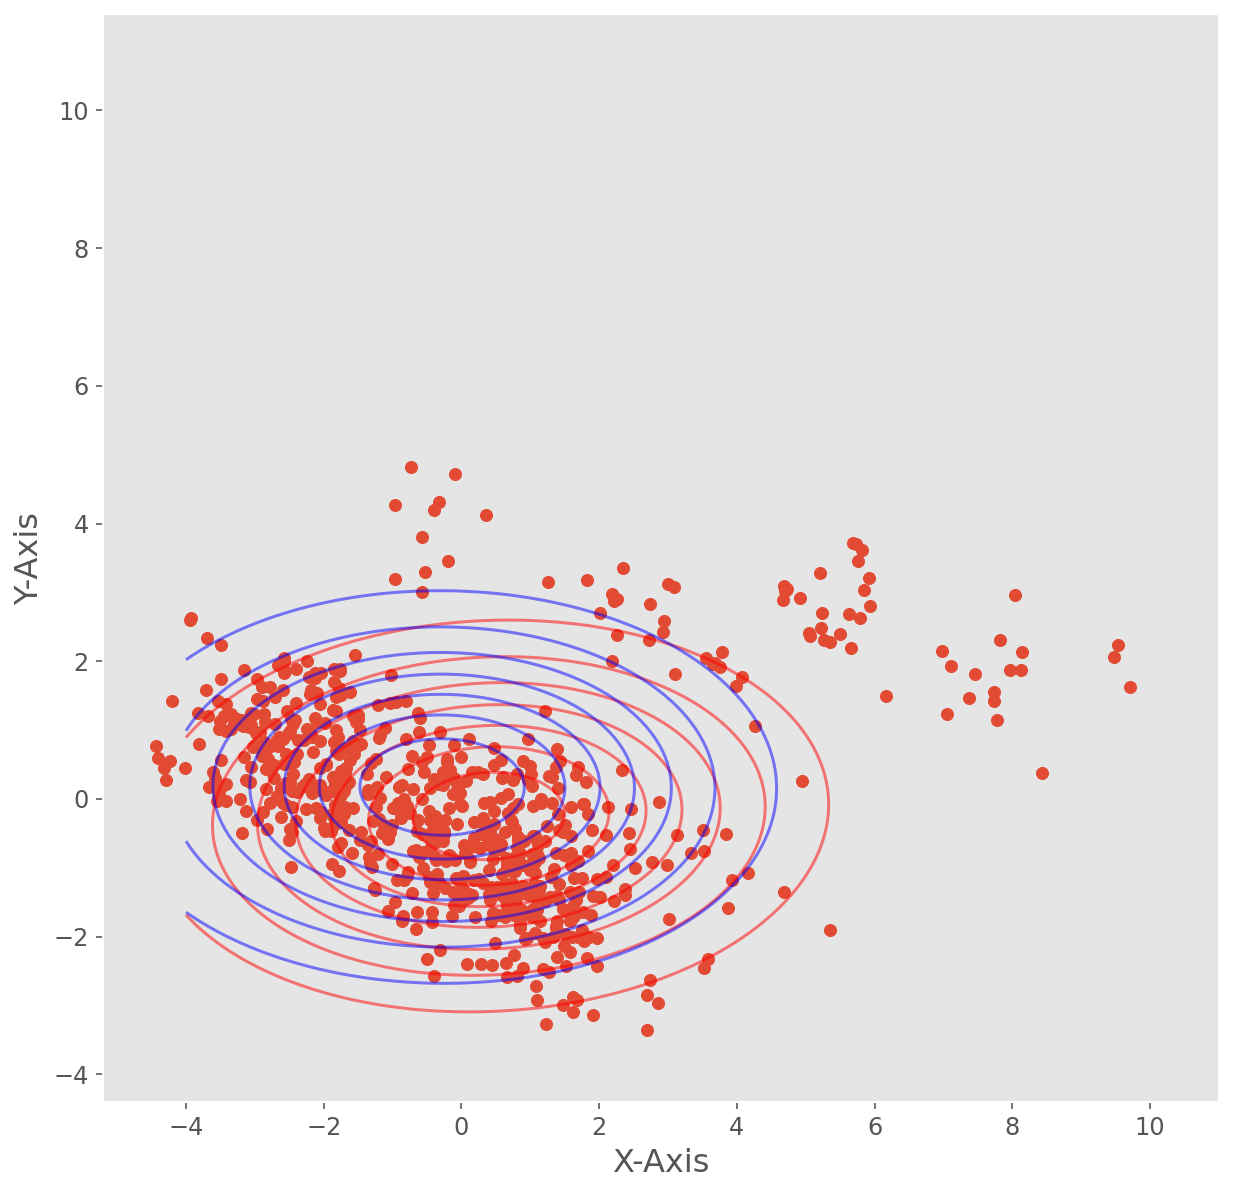

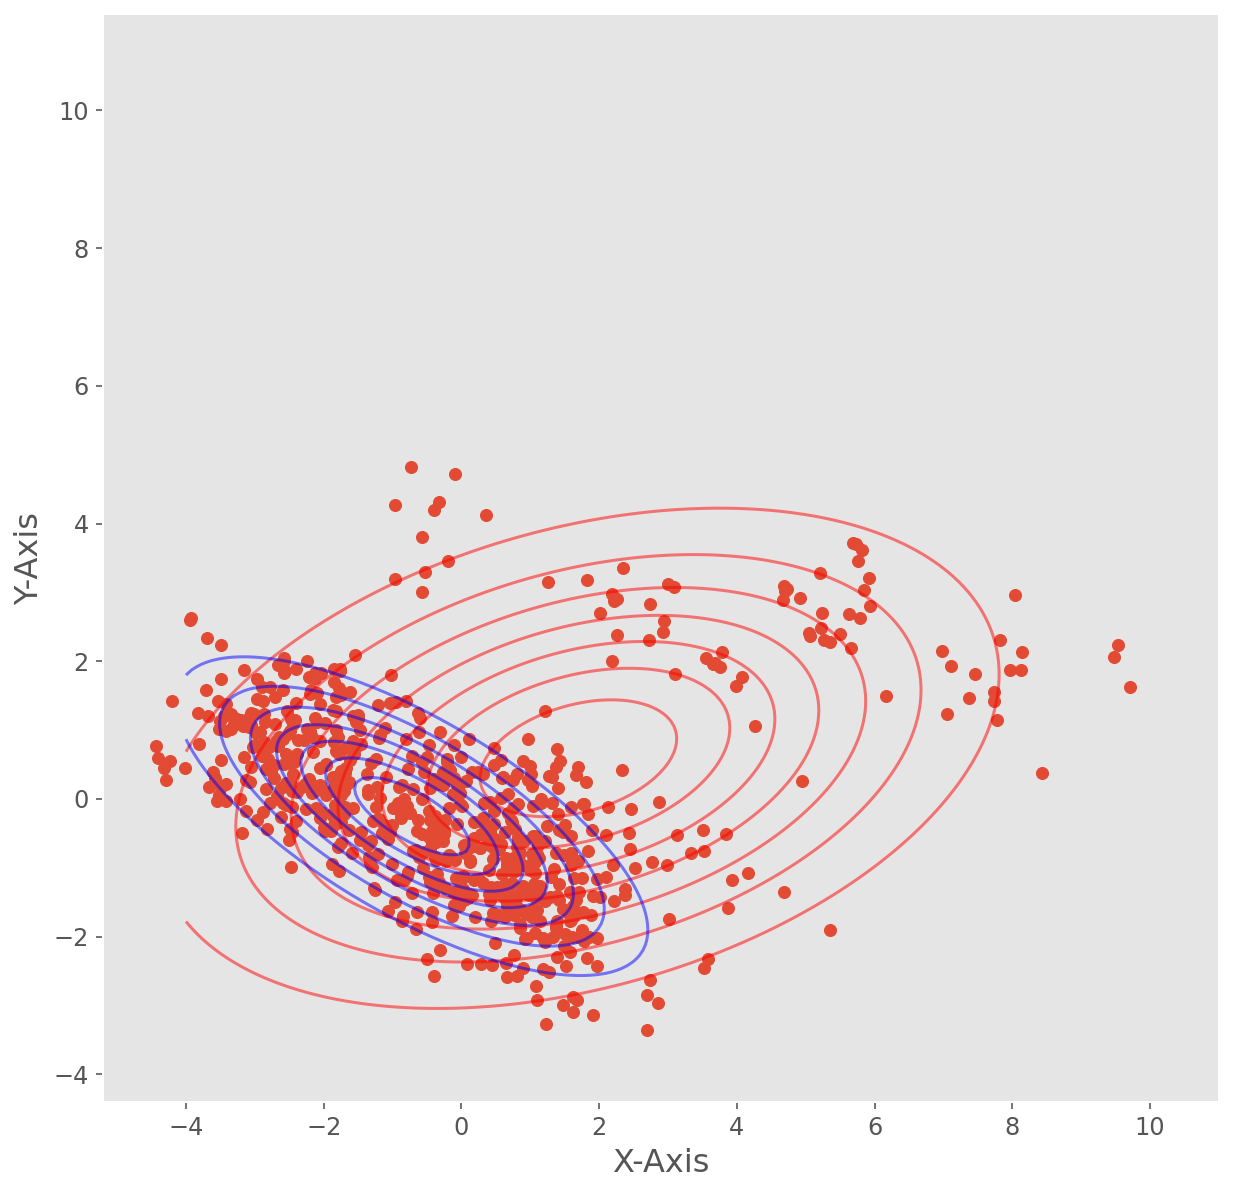

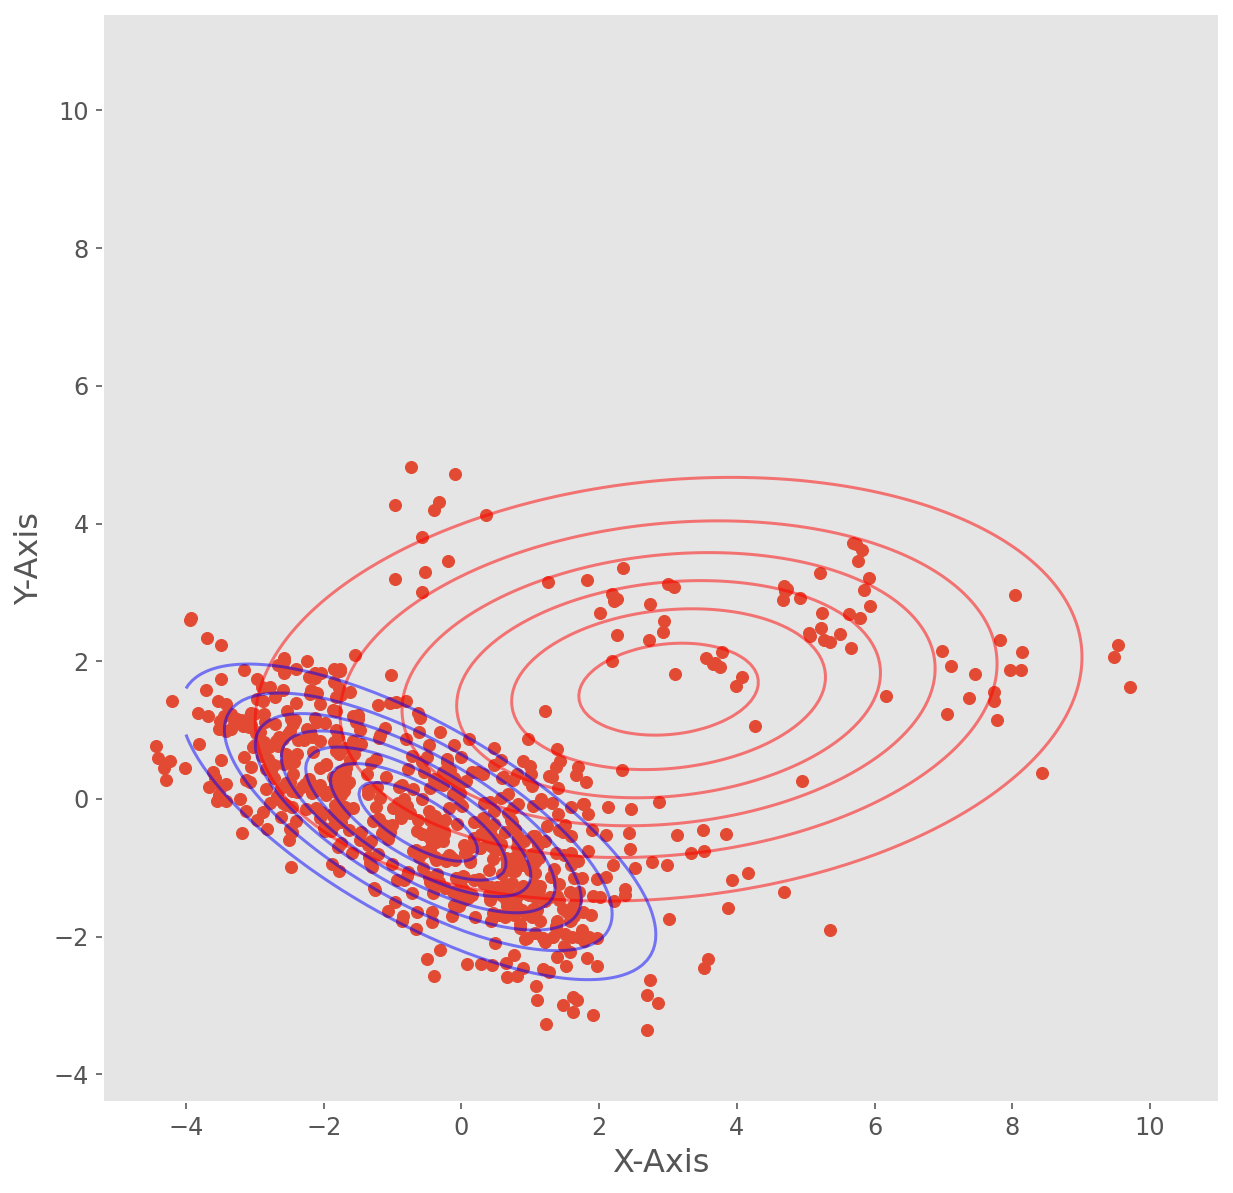

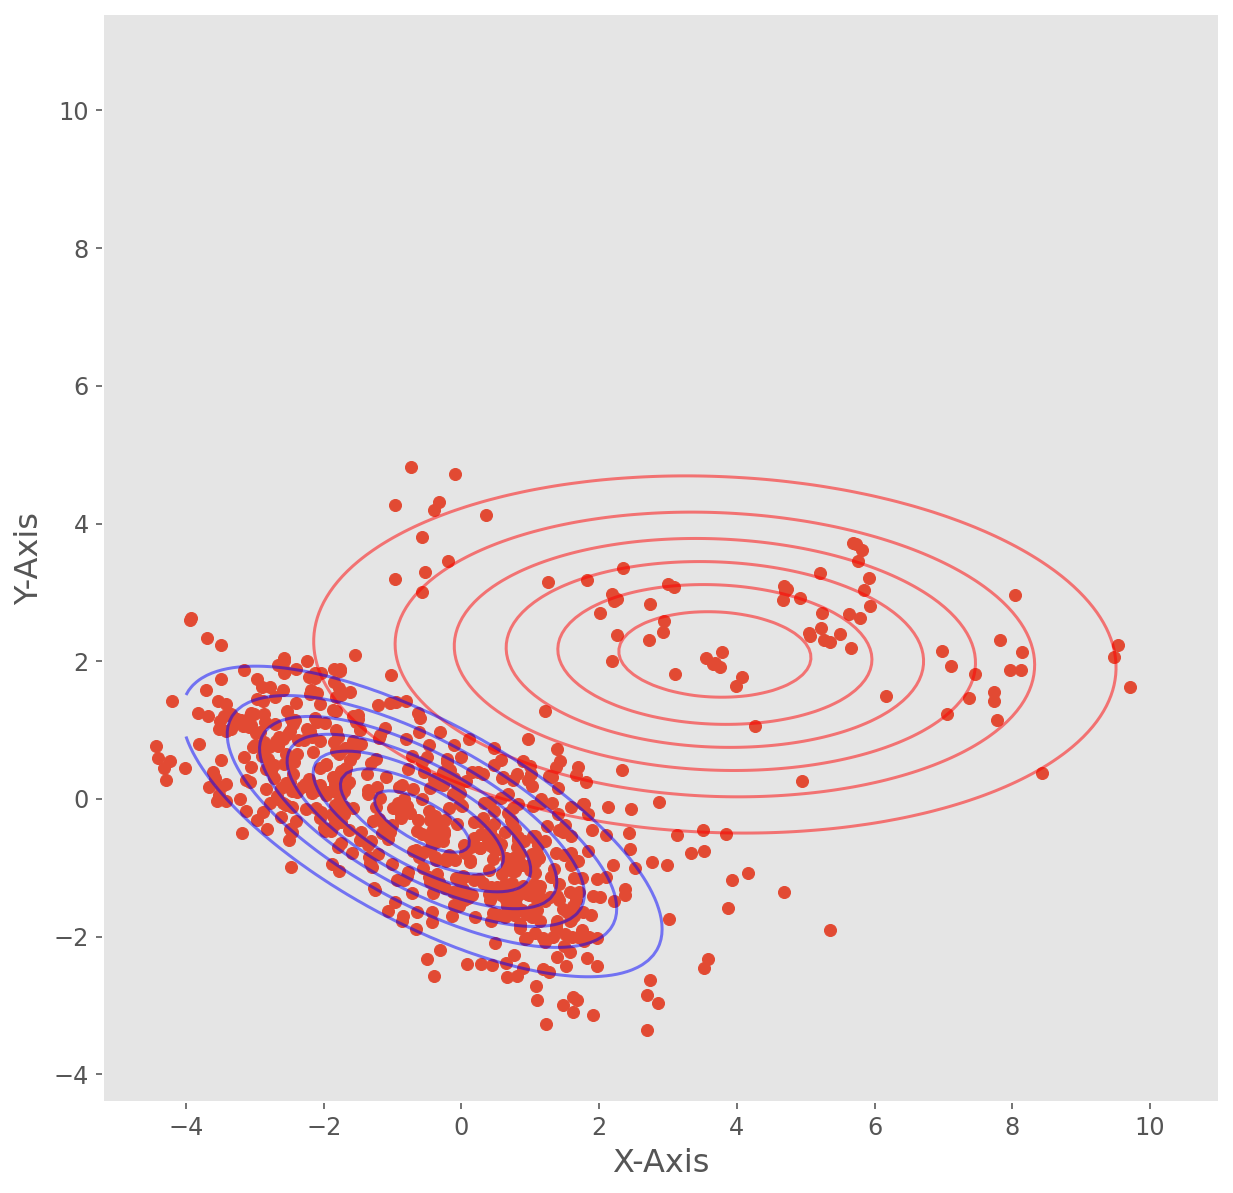

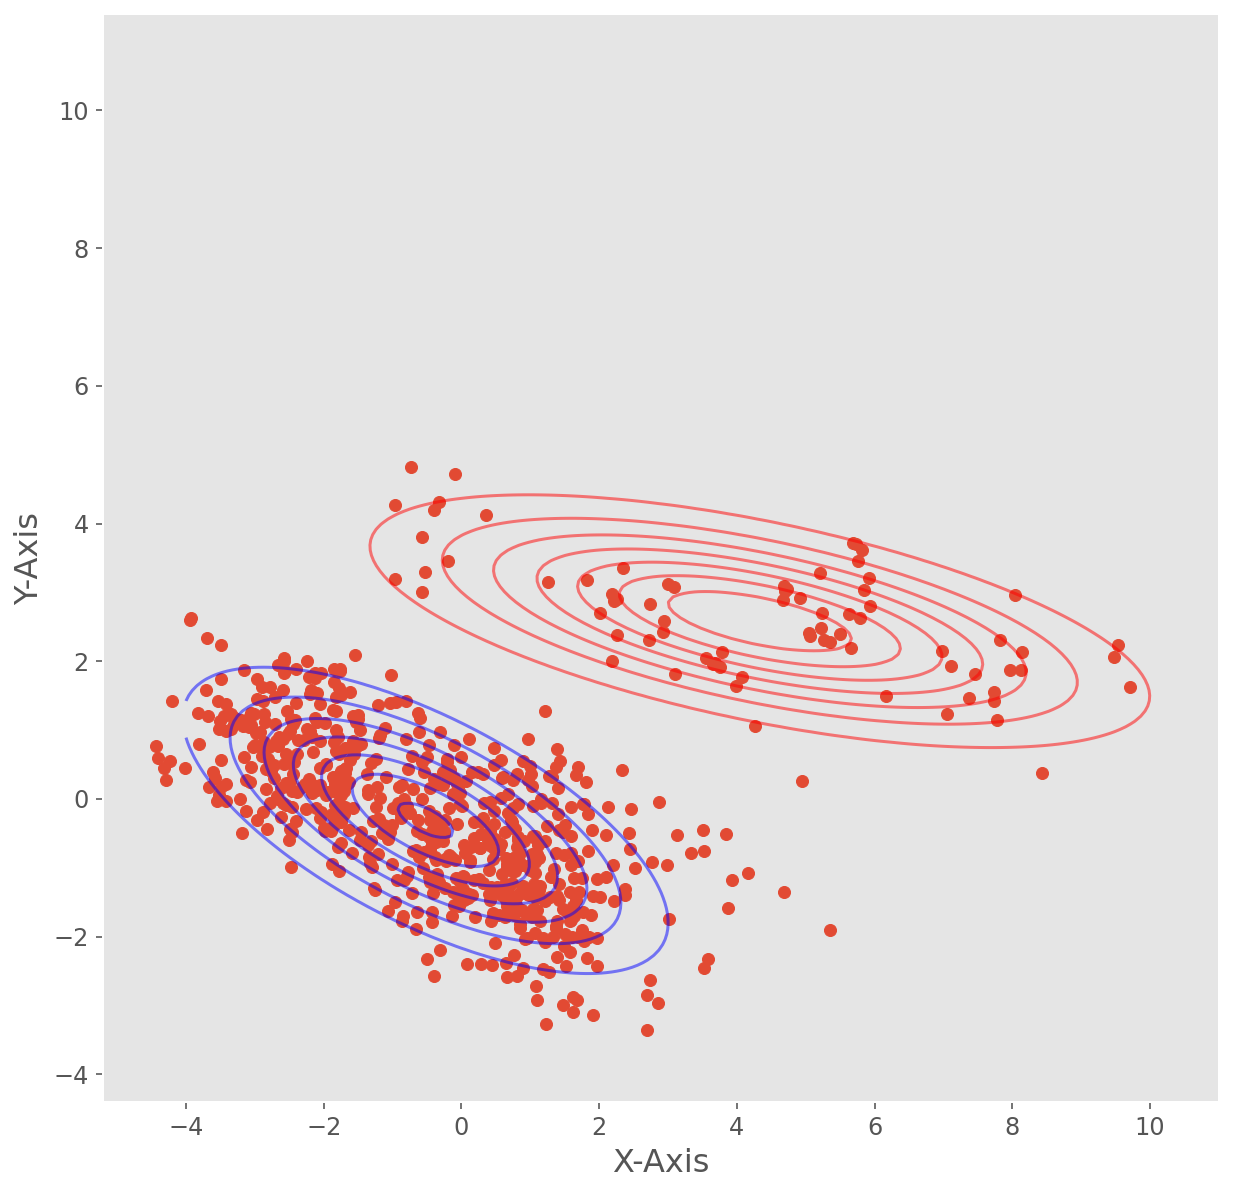

In [81]:
iterations = 20
lis1=[m1,m2,cov1,cov2,pi]
for i in range(0,iterations):
    lis2 = Mstep(Estep(lis1))
    lis1=lis2
    if i==0 or i == 4 or i == 9 or i == 14 or i == 19:
        plot(lis1)

### Evaluation

## 4. Gaussian Mixture Models Clustering

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

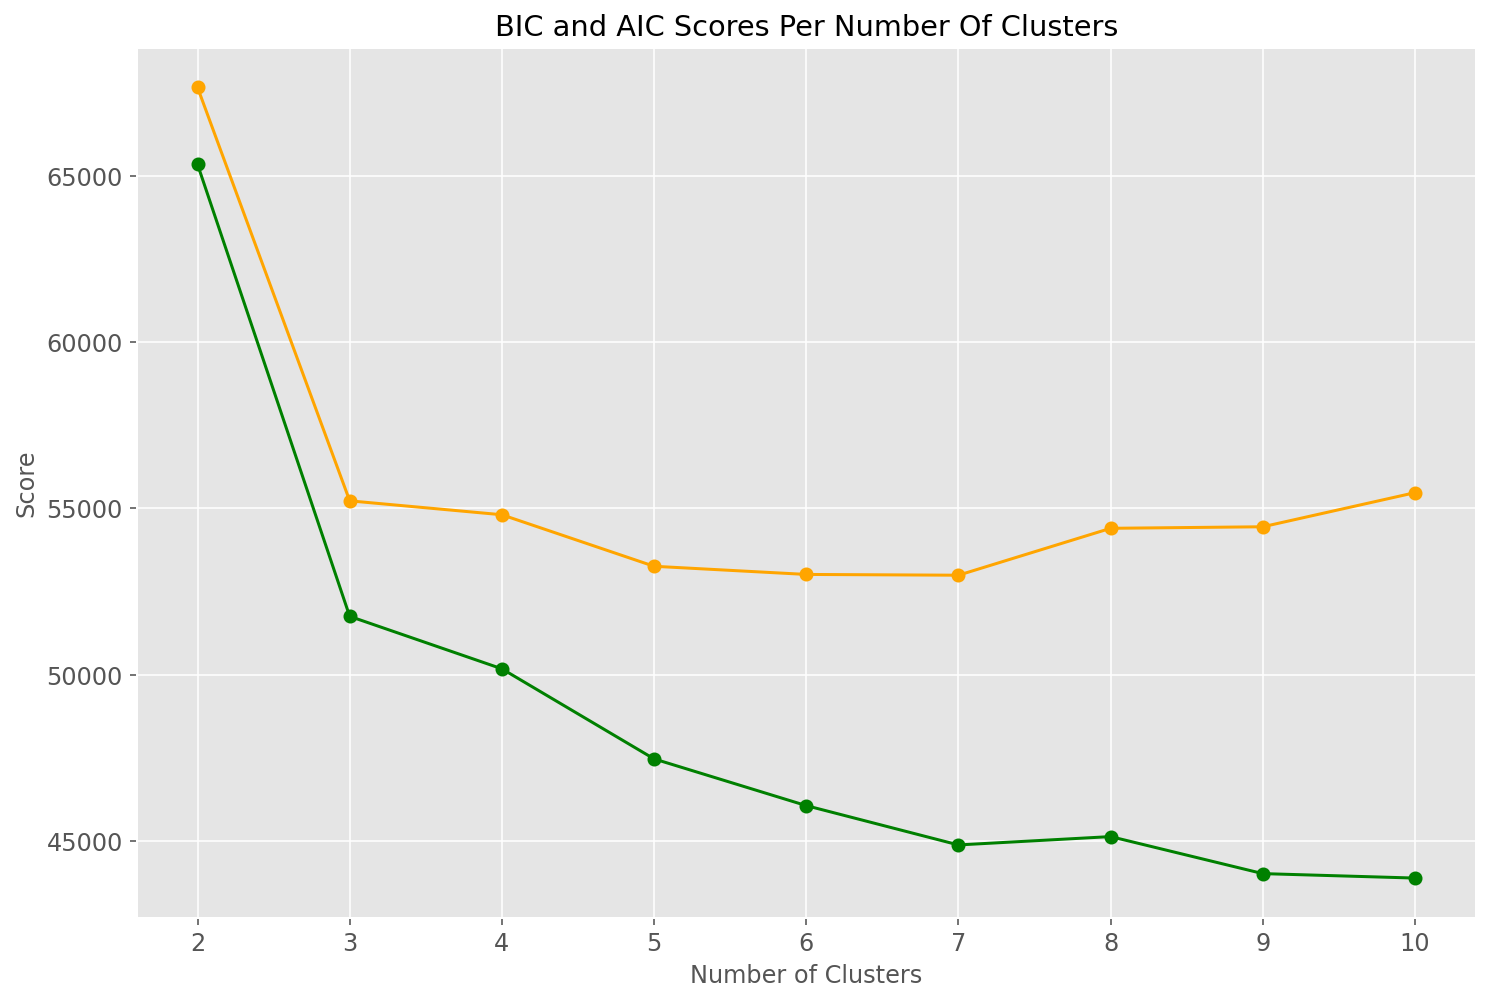

In [82]:
# Import the GaussianMixture class
from sklearn.mixture import GaussianMixture

# Set up a range of cluster numbers to try
n_range = range(2,11)

# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(pokemon)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(pokemon))
    aic_score.append(gm.aic(pokemon))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

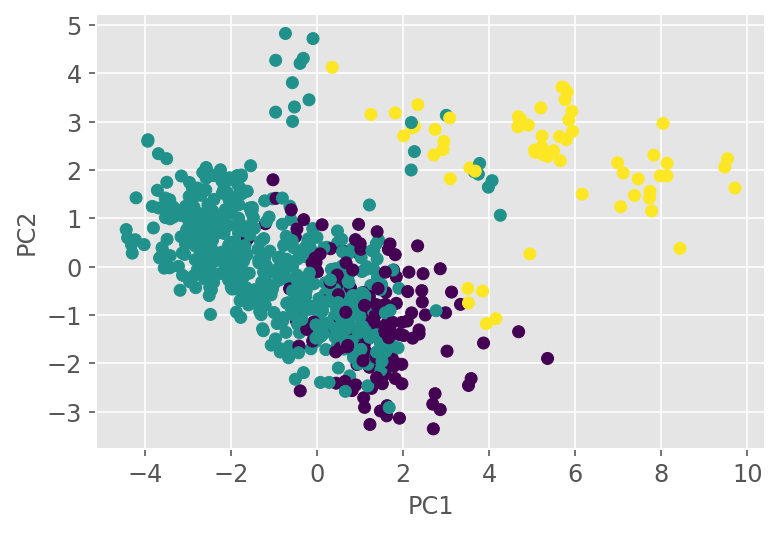

In [83]:
data = scaled_pokemon_data_with_target
gmm = GaussianMixture(n_components=3)
gmm.fit_predict(data)

plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=gmm.predict(data) )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Evaluation

## 5. Hierarchical Clustering

Performing agglomerative hierarchical clustering on the dataset, we will use the normalized dataset (scaled_pokemon_data_with_target).

First, we'll try with 2 clusters. 

In [84]:
#Use this instead of scaled_pokemon_data_with_target if scaling isn't the right thing.
from sklearn.preprocessing import normalize
normalizedPoke = normalize(pokemon) 

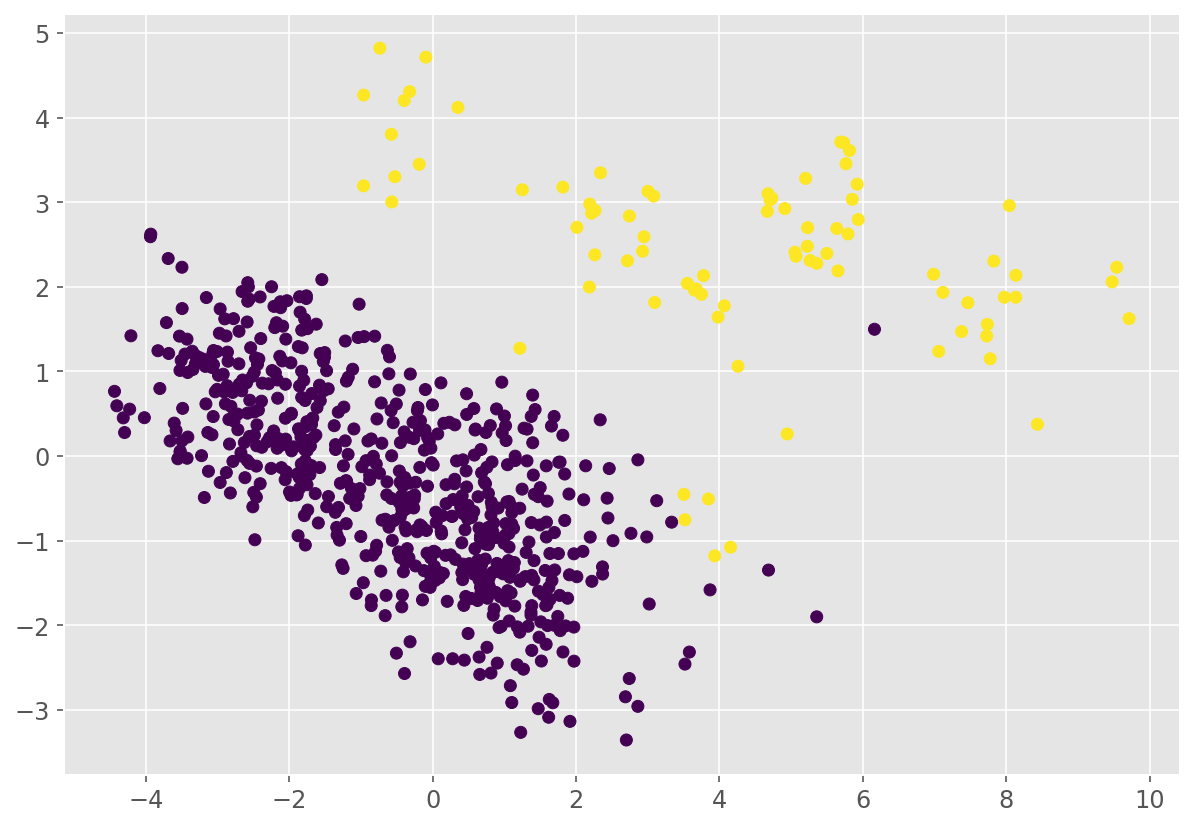

In [85]:
from sklearn.cluster import AgglomerativeClustering
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster2.fit_predict(scaled_pokemon_data_with_target)

plt.figure(figsize=(10, 7))  
two_clusters_fig = plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=cluster2.labels_)

### Now 3 clusters to compare with the baseline, k-means algorithm

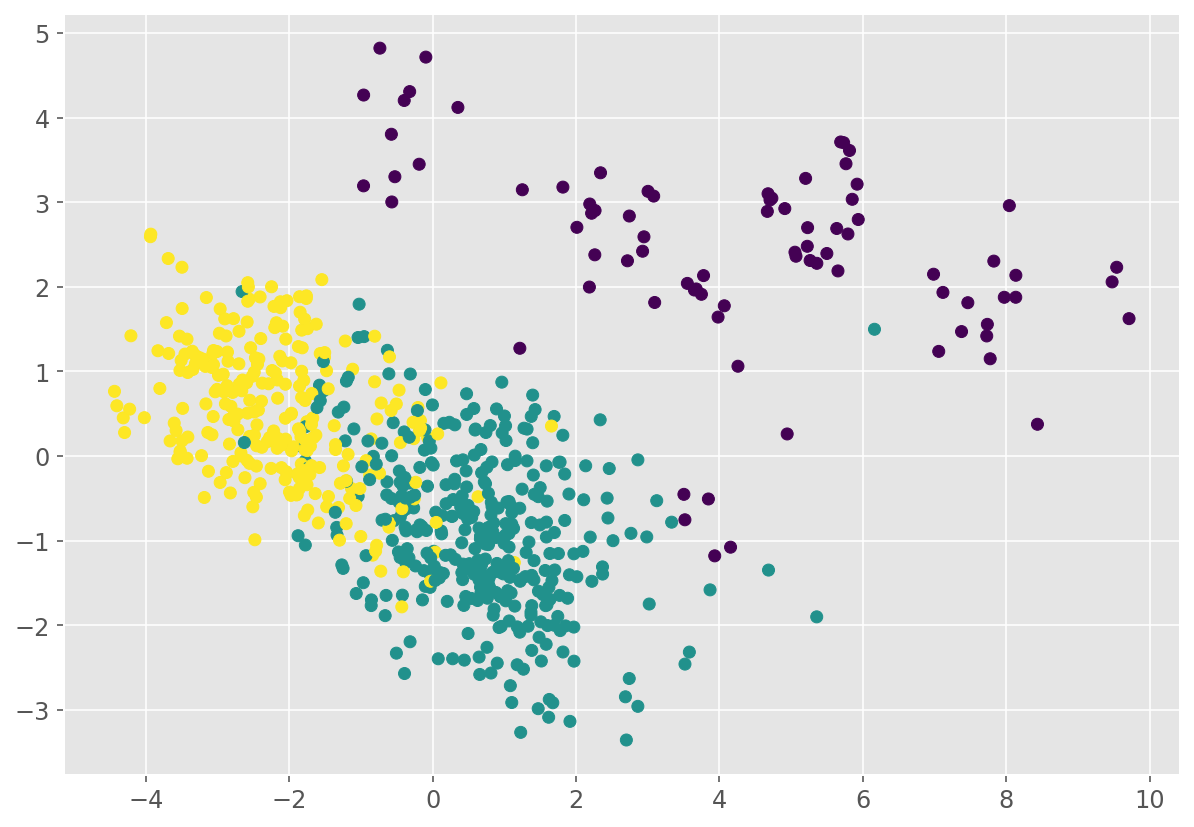

In [86]:
from sklearn.cluster import AgglomerativeClustering
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster3.fit_predict(scaled_pokemon_data_with_target)

plt.figure(figsize=(10, 7))  
three_cluster_fig = plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=cluster3.labels_)

### Evaluation

Comparing the results to the K-means clustering algorithm, agglomerative has a lower accuracy as you can see that some parts of the first cluster (yellow) and the second cluster (blue) are incorrectly labeled. In the k-means baseline, there is a clear division between the two clusters. 

In addition to this, the third cluster (purple) consists of almost all the points separated from the first 2 clusters, however, in k-means, the points in the far left belong to the first cluster (yellow).

## 6. Investigating the algorithms to compute the optimal number of clusters

### Helper function for printing out figures

In [87]:
def plt_fig_n(x_data, y_data, y_label, x_label = "Number of Clusters"):  
    fig = plt.subplots(figsize = (10,5))
    plt.plot(x_data, y_data, 'o-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

### Elbow Clustering
The optimal number of clusters is the point where the change in inertia is significantly smaller than the previous change. i.e., where the graph "elbows".

**Result**: The optimal number of clusters is 3.

In [88]:
# Plotting inertia vs number of clusters
# max_k - maximum number of clusters
# data - data to be clustered.
def optimise_k_means(data, max_k):
    means = []
    inertias = []
 
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)

    plt_fig_n(means, inertias,"Inertia")

m:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


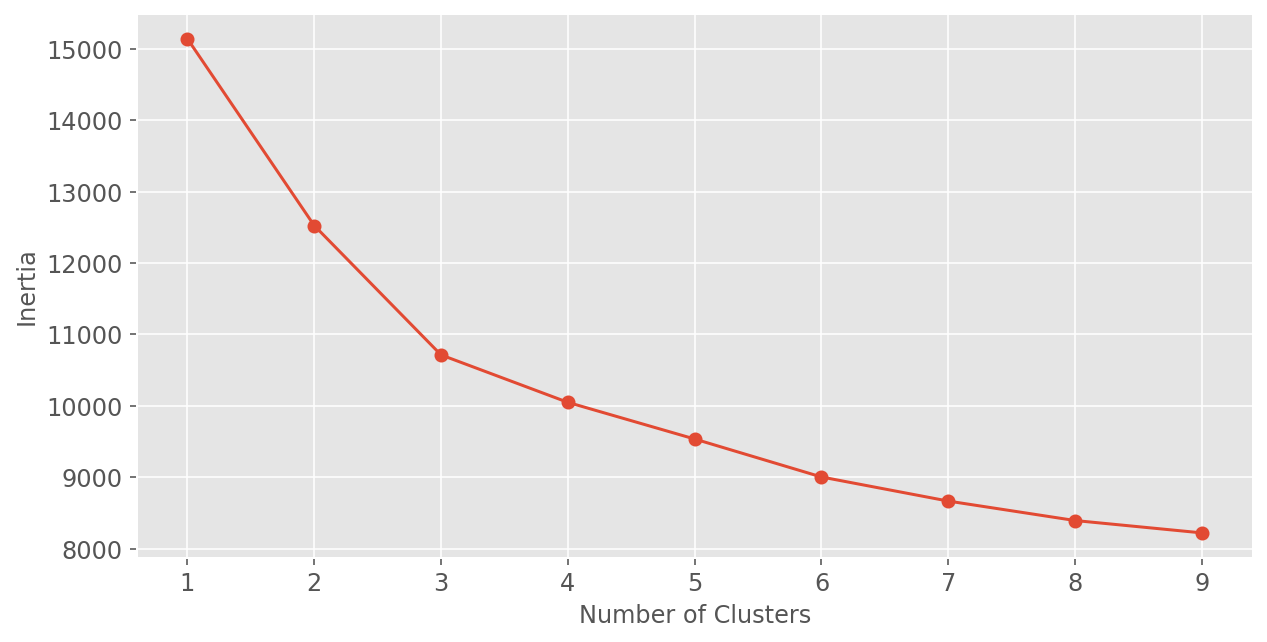

In [89]:
optimise_k_means(scaled_pokemon_data_with_target, 10)

It seems that the graph "elbows" at 3.

### Silhouette Clustering
**Result**: The optimal number of clusters using this algorithm is 2

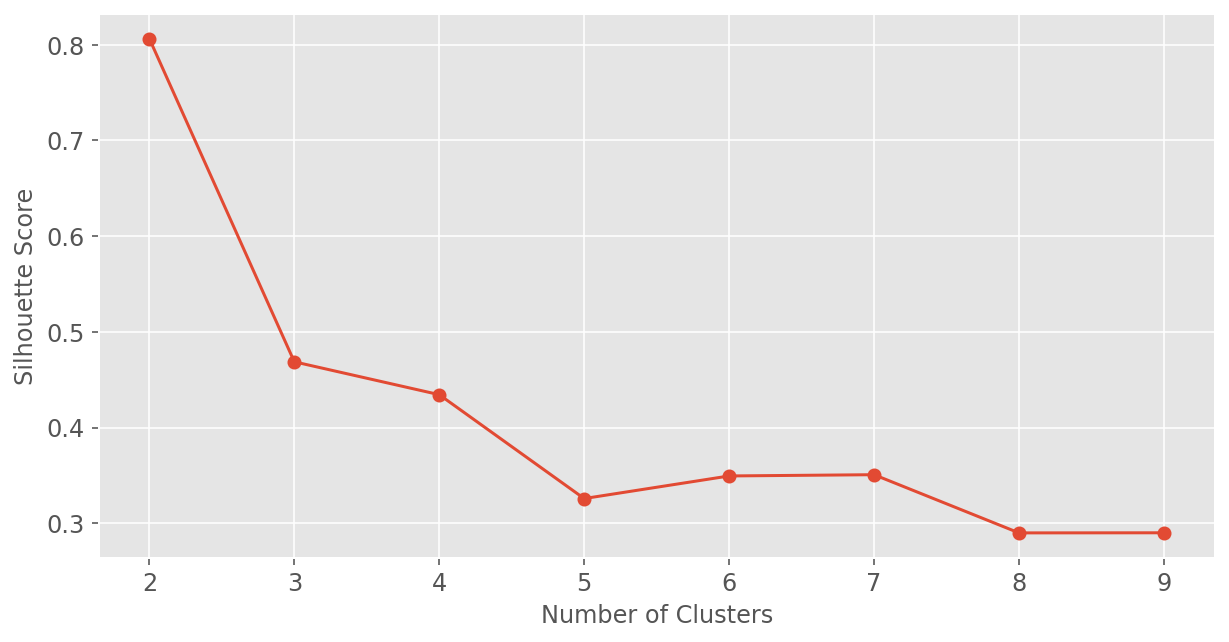

In [90]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

slist = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit_predict(pokemon_x) 
    score = silhouette_score(pokemon_x, kmeans.labels_, metric = 'euclidean')
    slist.append(score)


# Generate the silhouette plot
plt_fig_n([2,3,4,5,6,7,8,9],slist,"Silhouette Score")



If the silhouette score is low it generally means that the samples has been assigend to the wrong cluster. Silhouette score values near 0 indicate that the clusters are overlapping other clusters. For example, when we have 4 clusters we are getting a silhouette score of 0.45, which means the clusters are close to each other and each data point could be easily assinged to another cluster.

###  Davies-Bouldin score
**Result**: The optimal number of clusters found using this algorithm is 2.

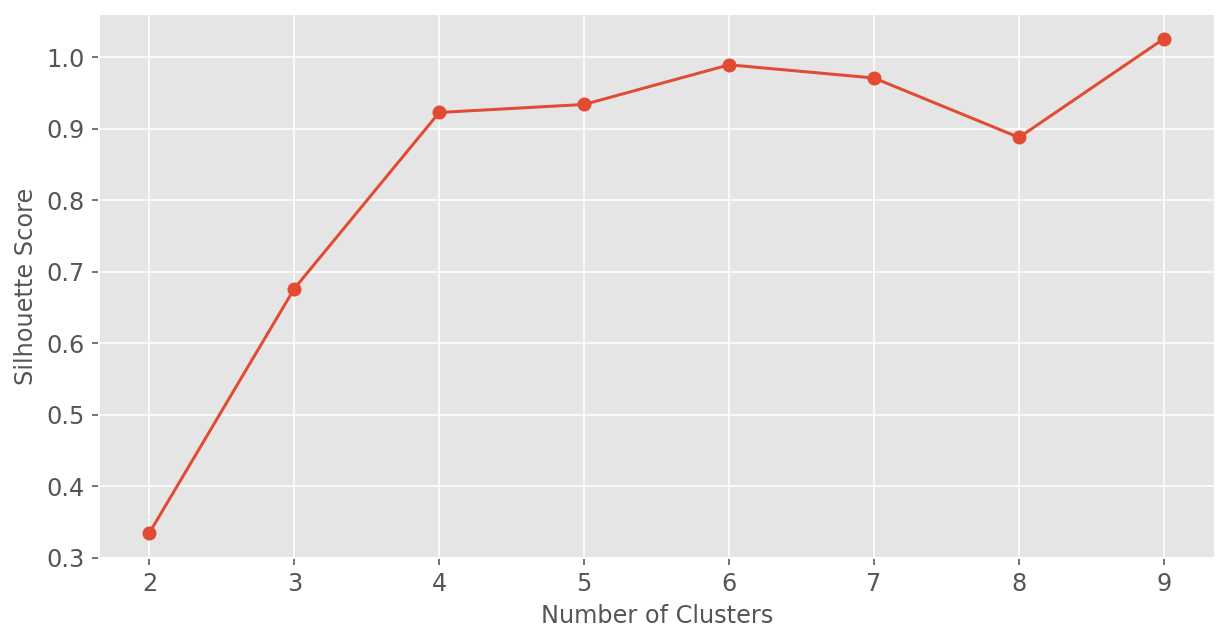

In [91]:
from sklearn.metrics import davies_bouldin_score
d_score_list = []
for x in range(2,10):
    kmeans = KMeans(n_clusters=x, random_state = 42).fit(pokemon_x)
    lab = kmeans.labels_
    d_score_list.append(davies_bouldin_score(pokemon_x, lab))

# Generate the Davies-Bouldin score plot
plt_fig_n([2,3,4,5,6,7,8,9],d_score_list,"Silhouette Score")
    

The closer the value of Davies Bouldin Score to 0 the better. The index signifies the average similarity between clusters. Similarity is the measure of the distance between the clusters and their sizes. For example, 2 is the best value of clusters for us, because 2s value is near 0.

### Calinski-Harabasz Index
**Result**: The optimal number of clusters using this algorithm is 2

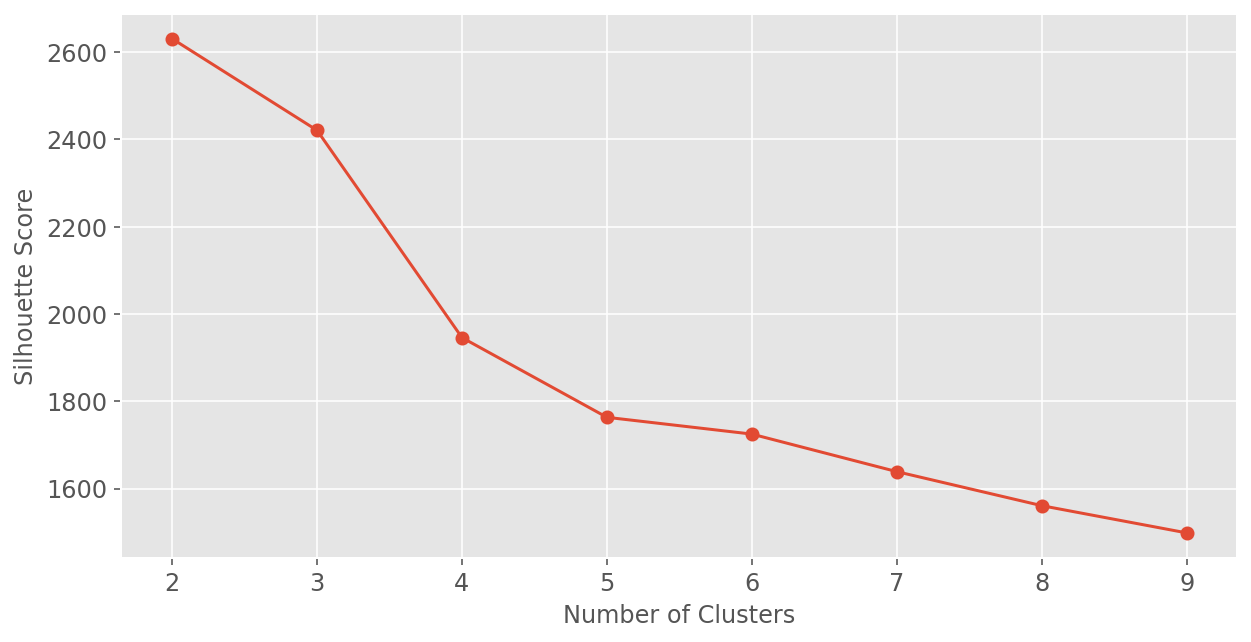

In [92]:
from sklearn.metrics import calinski_harabasz_score
d_score_list = []
for x in range(2,10):
    kmeans = KMeans(n_clusters=x, random_state = 42).fit(pokemon_x)
    lab = kmeans.labels_
    d_score_list.append(calinski_harabasz_score(pokemon_x, lab))

# Generate the Calinski-Harabasz Index score plot
plt_fig_n([2,3,4,5,6,7,8,9],d_score_list,"Silhouette Score")

### Evaluating the Clustering Algorithms
What is the optimal number of clusters?


Consider the table of results below:

In [93]:
results = {'Algorithm': ['Elbow Clustering', 'Silhouette Clustering', 'Davies-Bouldin Score', 'Calinski-Harabasz Index'],
            'Optimal N. of Clusters': ['3', '2', '2', '2']}
results = pd.DataFrame(results)
print(results)

                 Algorithm Optimal N. of Clusters
0         Elbow Clustering                      3
1    Silhouette Clustering                      2
2     Davies-Bouldin Score                      2
3  Calinski-Harabasz Index                      2


**Results**: From the table, we can infer that the optimal amount of clusters for our dataset is 2. 

## 7. Evaluating K-Means again, this time with 2 clusters.
75% of the algorithms investigated in the previous section computed that 2 clusters are optimal. This makes more sense as there are only 2 groups of pokemon in terms of the isLegendary category.

**The end of this section presents the findings of K-means**

#### Running KMeans with 2 clusters

In [94]:
# Applying the Kmeans algorithm
kmeans = KMeans(n_clusters=2)
# Running on the data with the target class.
kmeans.fit(scaled_pokemon_data_with_target)

KMeans(n_clusters=2)

#### Visualising the results

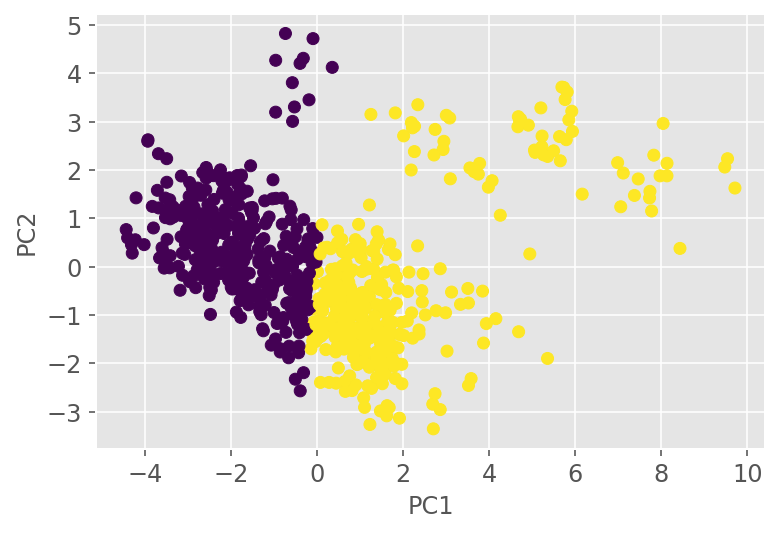

In [95]:
# Visualising the results
plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [96]:
# Applying the Kmeans algorithm
kmeans = KMeans(n_clusters=2)
# Running on the data with the target class.
kmeans.fit(scaled_pokemon_data_with_target)

KMeans(n_clusters=2)

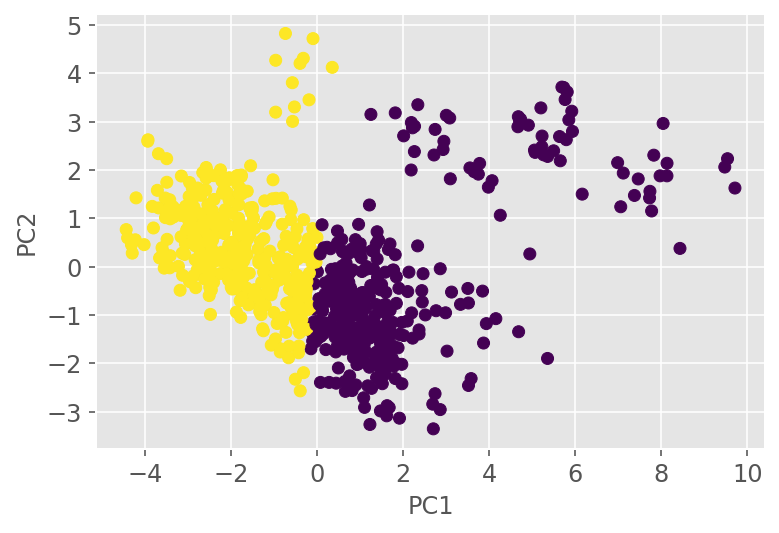

In [97]:
# Visualising the results
plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Comparing the KMeans results with the ground truth...

[]

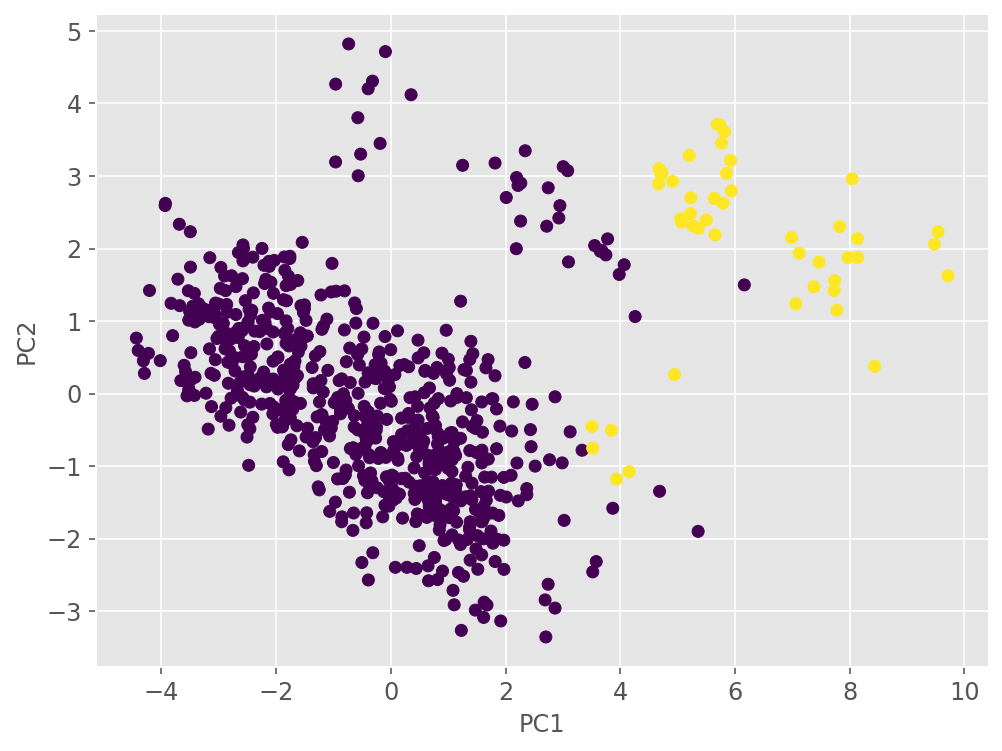

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=pokemon['isLegendary'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.plot()

### Findings and Evaluation of KMeans Clustering

Looking at the Kmeans graph in section 7, the yellow cluster is homogenous, meaning all samples in that cluster belongs to the same class. Meanwhile the blue cluster seems to have 50% homogeneity.

In [99]:
# Calculating the V-measure, which is a function of the homogeneity and completeness of the clustering
from sklearn.metrics import v_measure_score
print(v_measure_score(pokemon['isLegendary'], kmeans.labels_))

0.10498601082746181


#### Looking at the isLegendary class of the pokemon data vs clusters they were assigned to

In [100]:
results = pd.DataFrame({'Cluster Labels (Predicted)': kmeans.labels_, 
        'isLegendary (Actual)': pokemon['isLegendary']})
results

Cluster Labels (Predicted)  isLegendary (Actual)
0                             1                     0
1                             1                     0
2                             0                     0
3                             1                     0
4                             1                     0
..                          ...                   ...
716                           0                     1
717                           0                     1
718                           0                     1
719                           0                     1
720                           0                     1

[721 rows x 2 columns]

#### Creating a cross tabulation of the cluster labels and isLegendary classes, kind of like a confusion matrix.

In [101]:
cross_tabulation = pd.crosstab(results['isLegendary (Actual)'], results['Cluster Labels (Predicted)'])
cross_tabulation

Cluster Labels (Predicted)    0    1
isLegendary (Actual)                
0                           302  373
1                            46    0

#### Calculating common performance metrics

In [102]:
confusion_mtx_kmeans = np.asarray([[302,46],
                        [373,0]])
calculate_metrics(confusion_mtx_kmeans, pokemon['isLegendary'], kmeans.labels_, "Metrics for KMeans Clustering - 2 Clusters")

Metrics for KMeans Clustering - 2 Clusters
Accuracy: 0.42
Weighted Precision: 0.81
Weighted Recall: 0.42
Weighted F1-score: 0.55
TP: 302
FN: 46
FP: 373
TN: 0
Specificity: 0.0
Sensitivity: 0.867816091954023
The AUC is: 0.22370370370370368


## Dataset evaluation based on algorithms

- Based on the three algorithms ran and plotted (EM, GMM, and Hierarchical), it is clear that our dataset is **not** linearly separable. This means that the observations per group/class are not that similar and can be misclassified as another group/class (shown by the low accuracy per algorithm as well).
- This dataset also contains multiple outliers (as seen in the graphs), showing their values do not follow trends. This also makes most machine learning algorithms not work well with our dataset

## Comparison of performance with Naive Bayes Classifiers

Please refer to the isLegendary summary table in `Lab-Summary-Lab7-Week7.docx` file on Canvas (which contains a summary of the performance metrics of various naive bayes classifiers). The performance metrics for the KMeans algorithm can be viewed at the end of section 7.

On comparison of these results with the Naive Bayes Classifiers, our KMeans clustering algorithm does not perform any better than any of naive bayes algorithms. In fact, its values for all the performance metrics is much, much lower.

So, for our problem of trying to predict the isLegendary class of pokemon, clustering algorithms may not be appropriate.

## placeholder for pros and cons of diff algorithms

# Week 8: Decision Trees

In [103]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

## Decision Trees using J48/C4.5 Algorithm

In [104]:
clf = DecisionTreeClassifier()

FEATURE_NAMES = list(pokemon.drop(['isLegendary'], axis=1).columns)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9873949579831933


In [105]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image 


import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = FEATURE_NAMES,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


InvocationException: GraphViz's executables not found

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))
#
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [405  29], Accuracy: 0.980
Fold:  2, Training/Test Split Distribution: [406  28], Accuracy: 0.980
Fold:  3, Training/Test Split Distribution: [406  28], Accuracy: 1.000
Fold:  4, Training/Test Split Distribution: [406  29], Accuracy: 1.000
Fold:  5, Training/Test Split Distribution: [406  29], Accuracy: 0.979
Fold:  6, Training/Test Split Distribution: [406  29], Accuracy: 0.979
Fold:  7, Training/Test Split Distribution: [406  29], Accuracy: 0.979
Fold:  8, Training/Test Split Distribution: [406  29], Accuracy: 1.000
Fold:  9, Training/Test Split Distribution: [406  29], Accuracy: 1.000
Fold: 10, Training/Test Split Distribution: [406  29], Accuracy: 0.979


Cross-Validation accuracy: 0.988 +/- 0.010


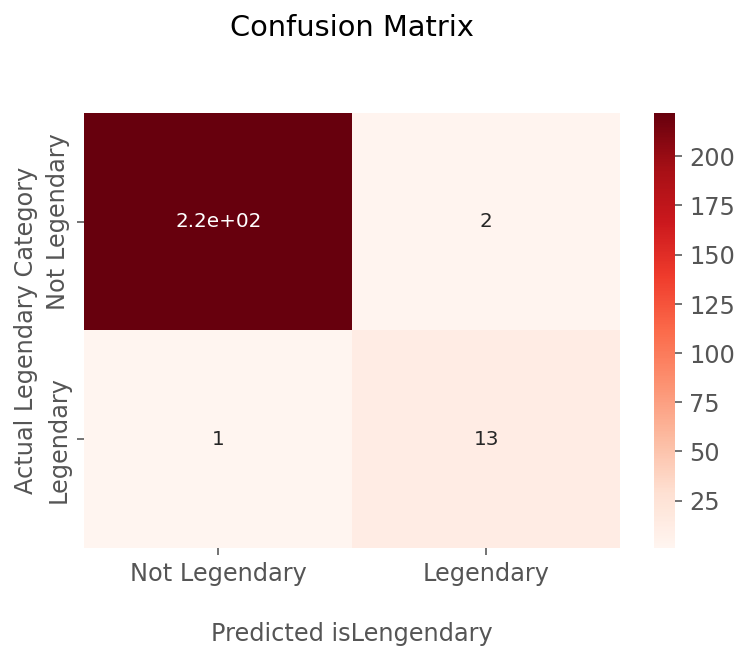

Evaluation of J48 Decision Tree on isLegendary
Accuracy: 0.99
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 222
FN: 2
FP: 1
TN: 13
Specificity: 0.05531914893617021
Sensitivity: 0.9910714285714286
The AUC is: 0.9598214285714286


In [107]:
matrix = confusion_matrix(y_test, y_pred)
plot_matrix(matrix)
calculate_metrics(matrix, y_test, y_pred, "Evaluation of J48 Decision Tree on isLegendary")

## Experimenting With Hyperparameters (J48/C4.5)

In [108]:
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

stdslc = StandardScaler()
pca = decomposition.PCA()
tree = DecisionTreeClassifier()

pipeline = Pipeline(steps=[('std_slc', stdslc), ('pca', pca), ('dec_tree', tree)])
n_components = list(range(1, pokemon_x.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components, dec_tree__criterion=criterion, dec_tree__max_depth=max_depth)

clf = GridSearchCV(pipeline, parameters)
clf.fit(pokemon_x, pokemon_y)

print('Best Criterion:', clf.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['dec_tree'])

scores_df = pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score')
scores_df

Best Criterion: gini
Best max_depth: 12
Best Number Of Components: 4

DecisionTreeClassifier(max_depth=12)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
103       0.005201      0.000400         0.001799        0.000400   
162       0.011800      0.007169         0.002999        0.001265   
223       0.005601      0.000490         0.001799        0.000400   
202       0.005601      0.000490         0.001399        0.000490   
63        0.007000      0.000002         0.002400        0.000800   
..             ...           ...              ...             ...   
155       0.006799      0.000980         0.001600        0.000490   
234       0.007201      0.000401         0.001799        0.000400   
99        0.006200      0.000400         0.001800        0.000400   
40        0.005401      0.000490         0.001400        0.000490   
160       0.009800      0.002315         0.003201        0.002041   

    param_dec_tree__criterion param_dec_tree__max_depth  \
103                      gini                        12   
162                   entropy                         6   
223                   entropy                        12   
202                   entropy                        10   
63                       gini                         8   
..                        ...                       ...   
155                   entropy                         4   
234                   entropy                        12   
99                       gini                        10   
40                       gini                         6   
160                   entropy                         6   

    param_pca__n_components  \
103                       4   
162                       3   
223                       4   
202                       3   
63                        4   
..                      ...   
155                      16   
234                      15   
99                       20   
40                        1   
160                       1   

                                                params  split0_test_score  \
103  {'dec_tree__criterion': 'gini', 'dec_tree__max...           0.993103   
162  {'dec_tree__criterion': 'entropy', 'dec_tree__...           0.993103   
223  {'dec_tree__criterion': 'entropy', 'dec_tree__...           0.993103   
202  {'dec_tree__criterion': 'entropy', 'dec_tree__...           0.993103   
63   {'dec_tree__criterion': 'gini', 'dec_tree__max...           0.993103   
..                                                 ...                ...   
155  {'dec_tree__criterion': 'entropy', 'dec_tree__...           0.979310   
234  {'dec_tree__criterion': 'entropy', 'dec_tree__...           0.986207   
99   {'dec_tree__criterion': 'gini', 'dec_tree__max...           0.993103   
40   {'dec_tree__criterion': 'gini', 'dec_tree__max...           0.986207   
160  {'dec_tree__criterion': 'entropy', 'dec_tree__...           0.979310   

     split1_test_score  split2_test_score  split3_test_score  \
103           0.986111           0.972222           0.979167   
162           0.979167           0.986111           0.972222   
223           0.986111           0.972222           0.972222   
202           0.979167           0.979167           0.972222   
63            0.986111           0.972222           0.972222   
..                 ...                ...                ...   
155           0.944444           0.958333           0.972222   
234           0.944444           0.951389           0.972222   
99            0.923611           0.965278           0.965278   
40            0.958333           0.965278           0.951389   
160           0.958333           0.965278           0.951389   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
103           0.965278         0.979176        0.009834                1  
162           0.965278         0.979176        0.009834                1  
223           0.965278         0.977787        0.010221                3  
202           0.965278         0.977787        0.009229                3  
63            0.965278   

# Using The J48/C4.5 Algorithm with the best Parameters:

In [109]:
X_train, X_test, y_train, y_test = train_test_split(pokemon.drop(['isLegendary'], axis=1), pokemon['isLegendary'],train_size = 0.7, test_size=0.3, random_state=10)
decision_tree_class = DecisionTreeClassifier(criterion='entropy', max_depth=6)


## Tree1:

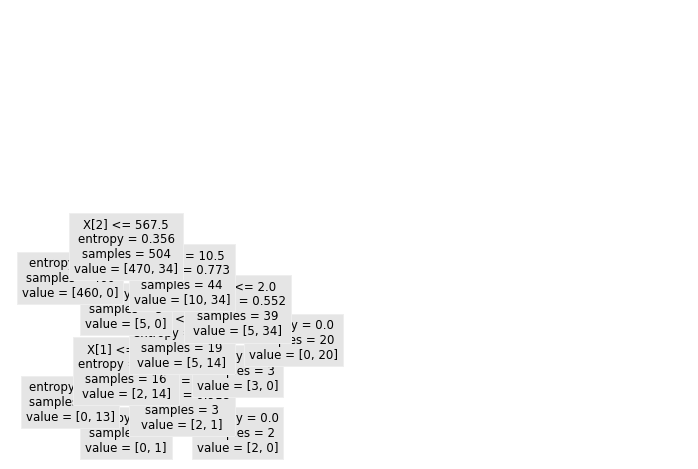

In [110]:
decision_tree_class.fit(X_train, y_train)
tree1_plot = plot_tree(decision_tree_class)

## Testing the results of Tree1:

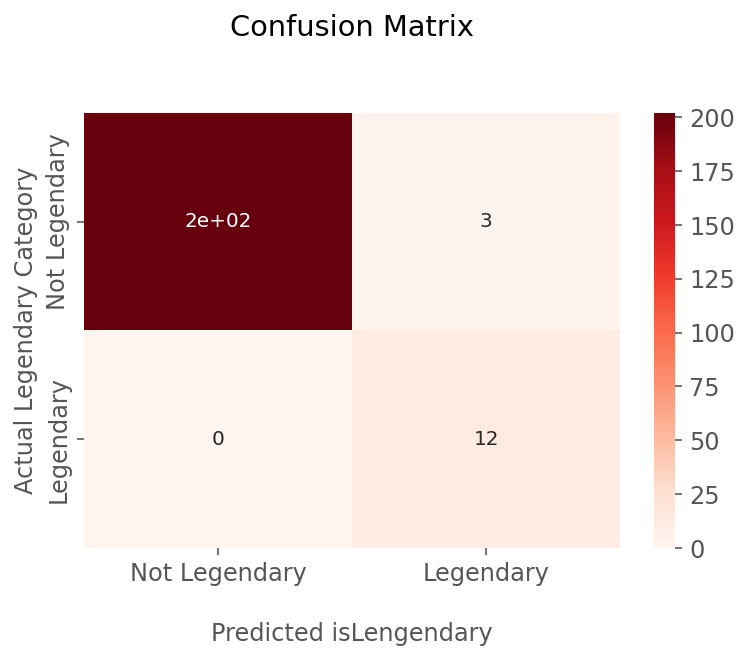

Evaluation of decision tree 1
Accuracy: 0.99
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 202
FN: 3
FP: 0
TN: 12
Specificity: 0.056074766355140186
Sensitivity: 0.9853658536585366
The AUC is: 0.9926829268292683


In [111]:
y_pred = decision_tree_class.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
plot_matrix(matrix)
calculate_metrics(matrix, y_test, y_pred, "Evaluation of decision tree 1")

## Tree2:

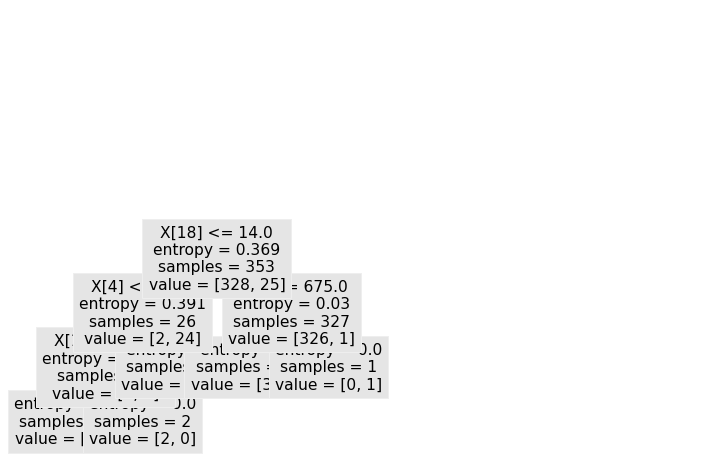

In [112]:
X_train, X_test, y_train, y_test = train_test_split(pokemon.drop(['isLegendary'], axis=1), pokemon['isLegendary'],train_size = 0.49, test_size=0.51, random_state=10)

decision_tree_class.fit(X_train, y_train)
tree2_plot = plot_tree(decision_tree_class)

## Testing the results of Tree2:

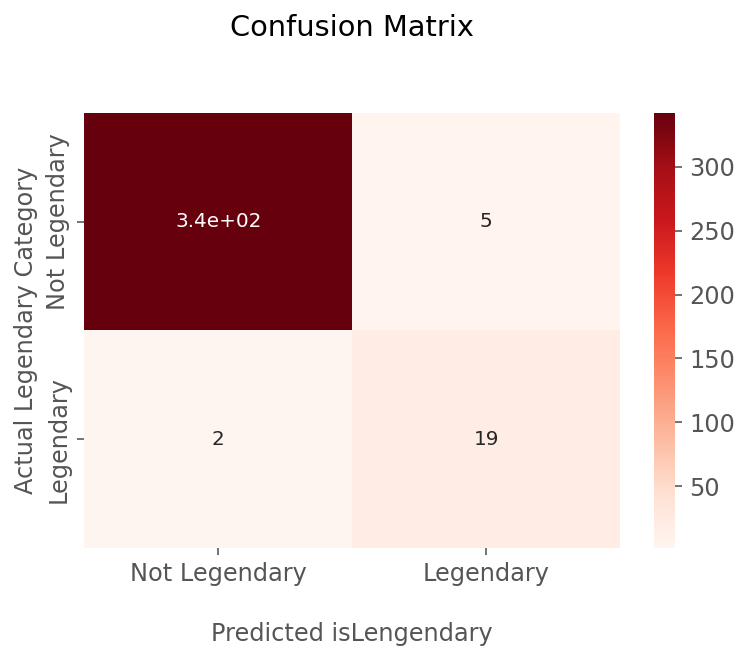

Evaluation of decision tree 2
Accuracy: 0.98
Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.98
TP: 342
FN: 5
FP: 2
TN: 19
Specificity: 0.05263157894736842
Sensitivity: 0.9855907780979827
The AUC is: 0.9451763414299436


In [113]:
y_pred = decision_tree_class.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
plot_matrix(matrix)
calculate_metrics(matrix, y_test, y_pred, "Evaluation of decision tree 2")

## Tree 3: Running the classifier, with 60% of the training set moved the testing set

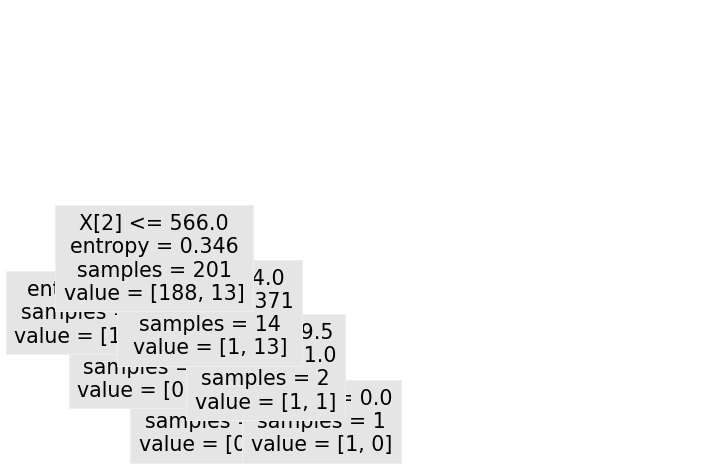

In [114]:
# Assuming the original tree is split as 70% - training and 30% - testing. 60% of the training set will
# be moved to the testing set therefore the train test split becomes 28% training and 72% testing.
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(pokemon.drop(['isLegendary'], axis=1), pokemon['isLegendary'],train_size = 0.28, test_size=0.72, random_state=10)
decision_tree_class = DecisionTreeClassifier(criterion='entropy', max_depth=6)
decision_tree_class.fit(X_train, y_train)
tree3_plot = plot_tree(decision_tree_class)

In [115]:
# Visualising the decisions made by the decision tree
from sklearn.tree import export_text
r = export_text(decision_tree_class, feature_names = list(X_train.columns))
print(r)

|--- Total <= 566.00
|   |--- class: 0
|--- Total >  566.00
|   |--- Catch_Rate <= 24.00
|   |   |--- class: 1
|   |--- Catch_Rate >  24.00
|   |   |--- Speed <= 99.50
|   |   |   |--- class: 1
|   |   |--- Speed >  99.50
|   |   |   |--- class: 0



### Evaluating tree 3

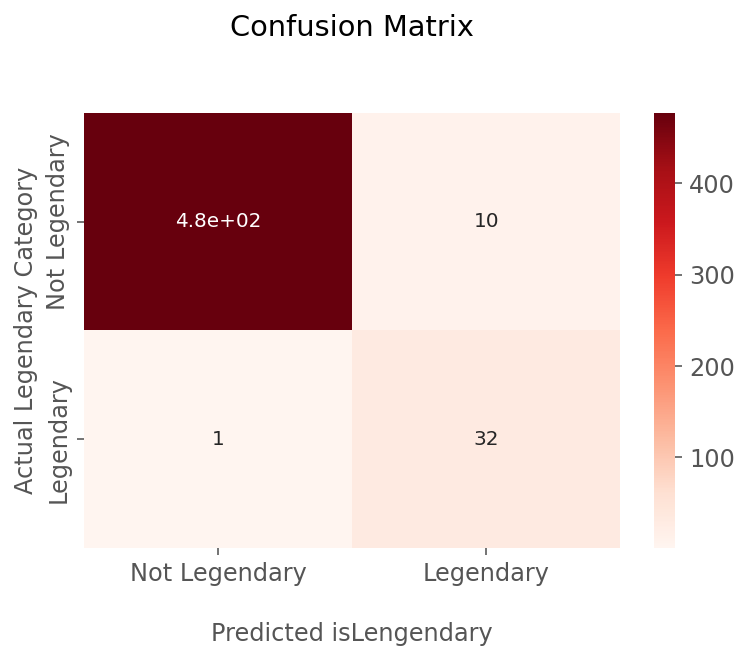

Evaluation of decision tree 3
Accuracy: 0.98
Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.98
TP: 477
FN: 10
FP: 1
TN: 32
Specificity: 0.06286836935166994
Sensitivity: 0.9794661190965093
The AUC is: 0.9745815443967395


In [116]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = decision_tree_class.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
plot_matrix(matrix)
calculate_metrics(matrix, y_test, y_pred, "Evaluation of decision tree 3")

## Decision Trees using Random Forest

## 1. Running the Random Forest Algorithm on the training set
Evaluated using 10-fold CV

## 2. Finding optimal parameters
The parameters manipulated could be depth of the tree, confident thresshold for pruning, splitting criteria, minimal number of instances per leaf.

In [117]:
# from sklearn.model_selection import GridSearchCV
# from sklearn import decomposition
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# # !pip install sklearn_evaluation
# # from sklearn_evaluation import plot

# std_slc = StandardScaler()
# pca = decomposition.PCA()
# dec_tree = RandomForestClassifier()

# pipe = Pipeline(steps=[('std_slc', std_slc),
#                        ('pca', pca),
#                        ('dec_tree', dec_tree)])

# n_components = list(range(1,pokemon.drop(['Generation'], axis=1).shape[1]+1,1))
# criterion = ['gini', 'entropy']
# max_depth = [2,4,6,8,10,12]
# max_features = ['auto', 'sqrt', 'log2']
# ccp_alpha = [0.1, .01, .001]


# parameters = dict(pca__n_components=n_components,
#                   dec_tree__criterion=criterion,
#                   dec_tree__max_depth=max_depth,
#                   dec_tree__max_features=max_features,
#                   dec_tree__ccp_alpha=ccp_alpha)

# clf_GS = GridSearchCV(pipe, parameters)
# clf_GS.fit(pokemon.drop(['isLegendary'], axis=1), pokemon['isLegendary'])

In [118]:
# print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
# print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
# print('Best max_features:', clf_GS.best_estimator_.get_params()['dec_tree__max_features'])
# print('Best ccp_alpha:', clf_GS.best_estimator_.get_params()['dec_tree__ccp_alpha'])
# print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
# print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

In [119]:
# X_train, X_test, y_train, y_test = train_test_split(pokemon.drop(['isLegendary'], axis=1), pokemon['isLegendary'], test_size=0.2, random_state=42)

# tree = DecisionTreeClassifier(max_depth=12, random_state=42, criterion='entropy', max_features='sqrt', ccp_alpha=0.01)
# tree.fit(X_train, y_train)

# plot_tree(tree);

In [120]:
# y_pred = tree.predict(X_test)
# matrix = confusion_matrix(y_test, y_pred)
# plot_matrix(matrix)
# calculate_metrics(matrix, y_test, y_pred, "Evaluating matrix")

## 3. Making Tree 1
Running random forest using the best working parameters (found in section 2).

### Forming the training and testing data
30% Testing, 70% Training

In [121]:
def plot_rf_tree(model):
    estimator = model.estimators_[99]
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = FEATURE_NAMES,class_names=['0','1'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [122]:
# Training the model
model = RandomForestClassifier(criterion="gini",ccp_alpha=0.001, max_depth=8, max_features='auto')


In [123]:
# Splitting the data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(pokemon.drop(['isLegendary'], axis=1), pokemon['isLegendary'],train_size = 0.7 ,test_size=0.3, random_state=10)
model.fit(X_train_rf,y_train_rf)


RandomForestClassifier(ccp_alpha=0.001, max_depth=8)

In [124]:
plot_rf_tree(model)

InvocationException: GraphViz's executables not found

#### Getting the predicted scores on the test set

In [125]:
y_predicted_rf = model.predict(X_test_rf)

### Evaluating Tree 1
Using the major performance metrics and plotting the confusion matrix.

Will answer the question: Does the decision tree generalize well to new data?

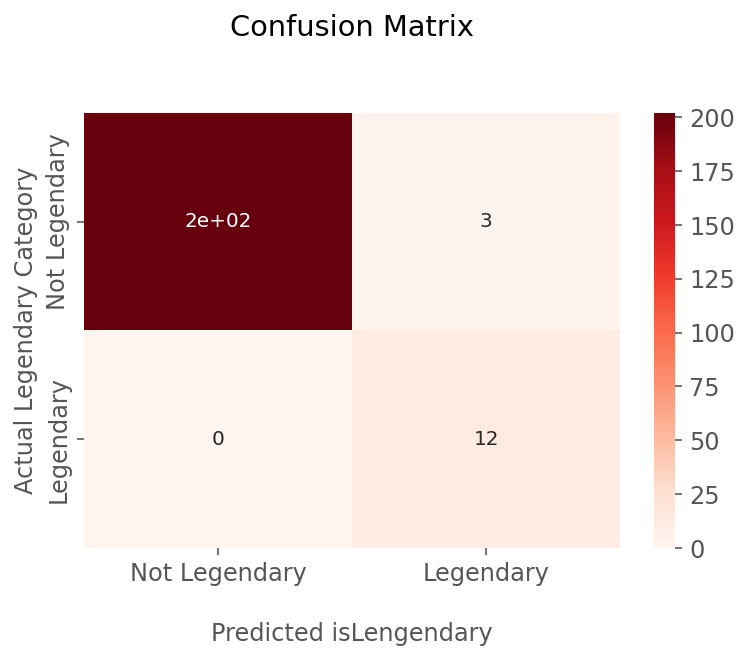

Evaluation of RF 1
Accuracy: 0.99
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 202
FN: 3
FP: 0
TN: 12
Specificity: 0.056074766355140186
Sensitivity: 0.9853658536585366
The AUC is: 0.9926829268292683


In [126]:

confusion_matrix_rf = confusion_matrix(y_test_rf, y_predicted_rf)
# print(confusion_matrix_rf)
plot_matrix(confusion_matrix_rf)
calculate_metrics(confusion_matrix_rf, y_test_rf, y_predicted_rf, "Evaluation of RF 1")

**Results**: The classifier using training and testing sets instead of 10-CV generalized well to test data, with 214 of 217 instances predicted correctly.

## 4. Making Tree 2
Running random forest, now with 30% of the training instances moved to the testing set

### Forming the training and testing data
By moving 30% of the training sample to the test sample.

In [127]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(pokemon.drop(['isLegendary'], axis=1), pokemon['isLegendary'],train_size = 0.49 ,test_size=0.51, random_state=10)
model.fit(X_train_rf,y_train_rf)


RandomForestClassifier(ccp_alpha=0.001, max_depth=8)

#### Getting the predicted values

In [128]:
y_predicted_rf = model.predict(X_test_rf)

### Evaluating Tree 2
Using major metrics and confusion matrix.

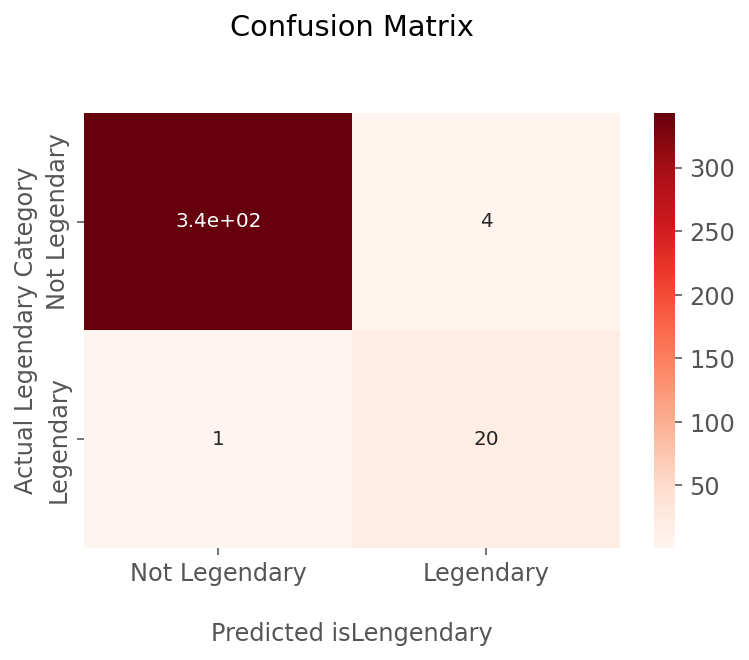

Evaluation of RF 2
Accuracy: 0.99
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 343
FN: 4
FP: 1
TN: 20
Specificity: 0.05509641873278237
Sensitivity: 0.9884726224783862
The AUC is: 0.9704267874296693


In [129]:

confusion_matrix_rf = confusion_matrix(y_test_rf, y_predicted_rf)
# print(confusion_matrix_rf)
plot_matrix(confusion_matrix_rf)
calculate_metrics(confusion_matrix_rf, y_test_rf, y_predicted_rf, "Evaluation of RF 2")

## 5. Making Tree 3
Running random forest, now with 60% of the training instances moved to the testing set.

In [130]:
# LGBM , Xgboost
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(pokemon.drop(['isLegendary'], axis=1), pokemon['isLegendary'],train_size = 0.28 ,test_size=0.72, random_state=10)
model.fit(X_train_rf,y_train_rf)


RandomForestClassifier(ccp_alpha=0.001, max_depth=8)

In [131]:
y_predicted_rf = model.predict(X_test_rf)

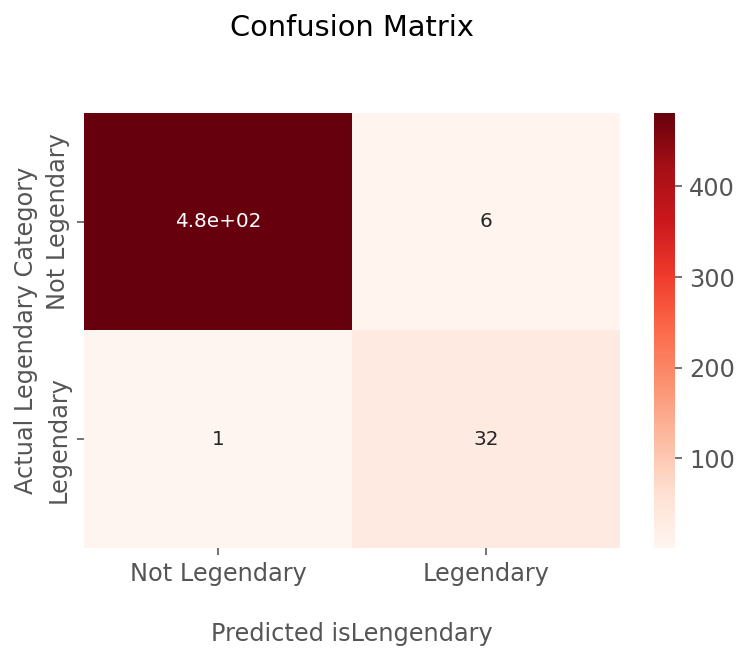

Evaluation of RF 3
Accuracy: 0.99
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99
TP: 481
FN: 6
FP: 1
TN: 32
Specificity: 0.06237816764132553
Sensitivity: 0.9876796714579056
The AUC is: 0.9786883205774377


In [132]:
confusion_matrix_rf = confusion_matrix(y_test_rf, y_predicted_rf)
# print(confusion_matrix_rf)
plot_matrix(confusion_matrix_rf)
calculate_metrics(confusion_matrix_rf, y_test_rf, y_predicted_rf, "Evaluation of RF 3")

# Evaluating the Results of the 3 Trees, Overfitting or not?

The following table summarizes the training/testing data split and their respective accuracies for the 3 trees. Training and testing are displayed as a % of the original dataset.

| Tree Number      | Training % | Testing % | Accuracy | F1-Score |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| 1  (Optimized Parameters) | 70 | 30 | 0.99 | 0.99|
| 2  (Moving 30% of training to testing) | 49  | 51 | 0.98 | 0.98|
| 3 (Moving 60% of training to testing) | 28  | 72 | 0.97 | 0.97|

The F1-Score and accuracy should have increased for test 2 and 3 if the model had overfitted, however, it had decreased instead. 

# Week 9: Regression

In [133]:
# Splitting into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pokemon_x, pokemon_y, test_size=0.3, random_state=10)
print(pokemon_x.dtypes)
print(pokemon_y.dtypes)

Type_1                int32
Type_2                int32
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
Color                 int32
hasGender             int32
Pr_Male             float64
Egg_Group_1           int32
Egg_Group_2           int32
hasMegaEvolution      int32
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style            int32
dtype: object
int32


## Runnning linear classifier on the training set

In [134]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
# Train the model
LR.fit(X_train, y_train)

# Test the learned model
y_pred = LR.predict(X_test)


### Evaluating the linear classifier

#### Calculating the MSE

In [135]:
# Calculating the mean square error
print("The mean square error is: "+str(np.mean((y_pred-y_test)**2)))

The mean square error is: 0.02724737231130149


**Hypothesis**: Because the MSE is quite low (<0.05), it could be that the pokemon data can be linearly separable.

### Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf = clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print("The accuracy of Logistic Regression:", score)
error = 1 - score
print("The error:", error)

The accuracy of Logistic Regression: 0.9769585253456221
The error: 0.02304147465437789


m:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression estimates the probablity of an event occuring. Over here, a correct prediction of the class was made 97% of the time.

## Testing diffrent learning rates on logistic regression

SGDClassifier(eta0=0.001, learning_rate='constant', loss='log')
Training score:  0.9484126984126984


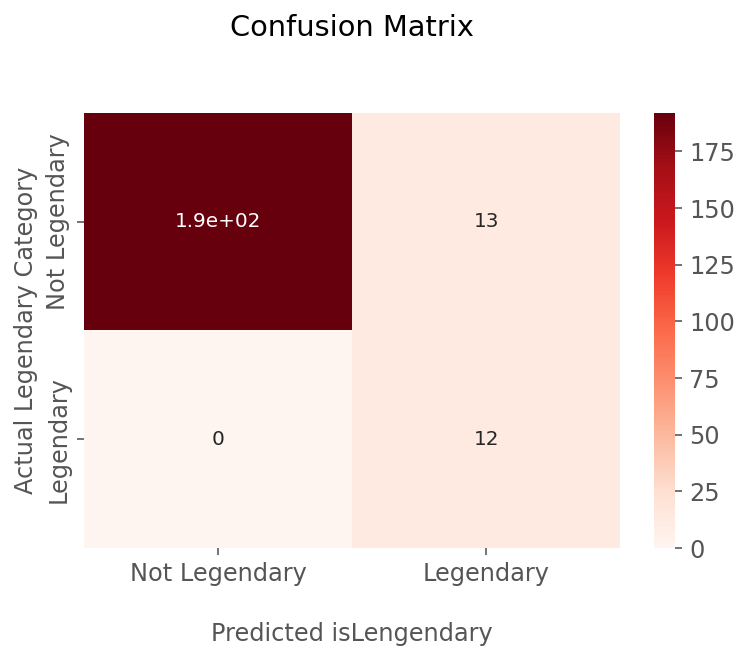

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       205
           1       0.48      1.00      0.65        12

    accuracy                           0.94       217
   macro avg       0.74      0.97      0.81       217
weighted avg       0.97      0.94      0.95       217



----------
SGDClassifier(eta0=0.003, learning_rate='constant', loss='log')
Training score:  0.9464285714285714


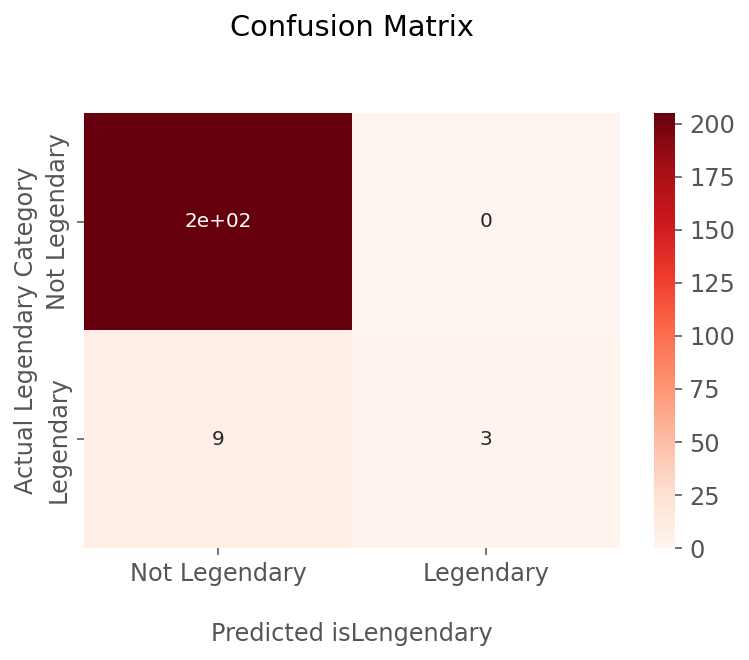

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       205
           1       1.00      0.25      0.40        12

    accuracy                           0.96       217
   macro avg       0.98      0.62      0.69       217
weighted avg       0.96      0.96      0.95       217



----------
SGDClassifier(eta0=0.005, learning_rate='constant', loss='log')
Training score:  0.9365079365079365


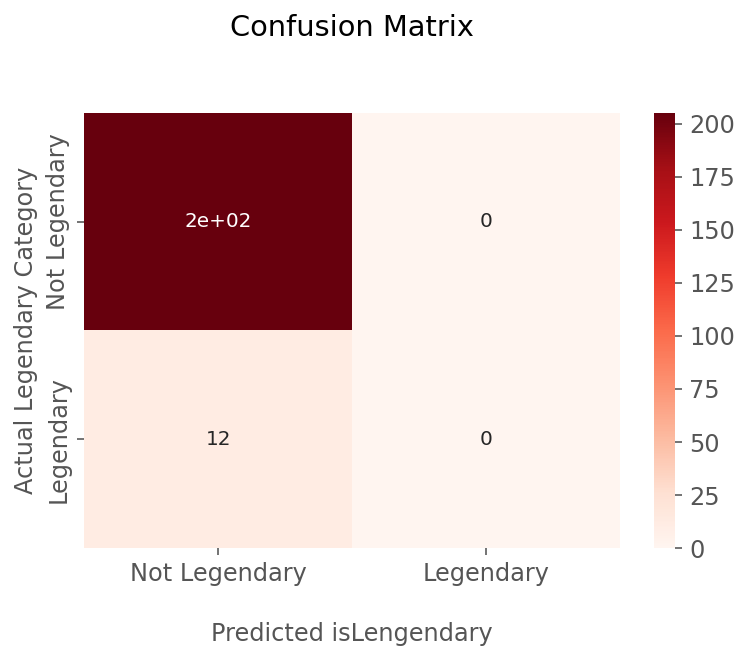

m:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
m:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
m:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       205
           1       0.00      0.00      0.00        12

    accuracy                           0.94       217
   macro avg       0.47      0.50      0.49       217
weighted avg       0.89      0.94      0.92       217



----------
SGDClassifier(eta0=0.01, learning_rate='constant', loss='log')
Training score:  0.9742063492063492


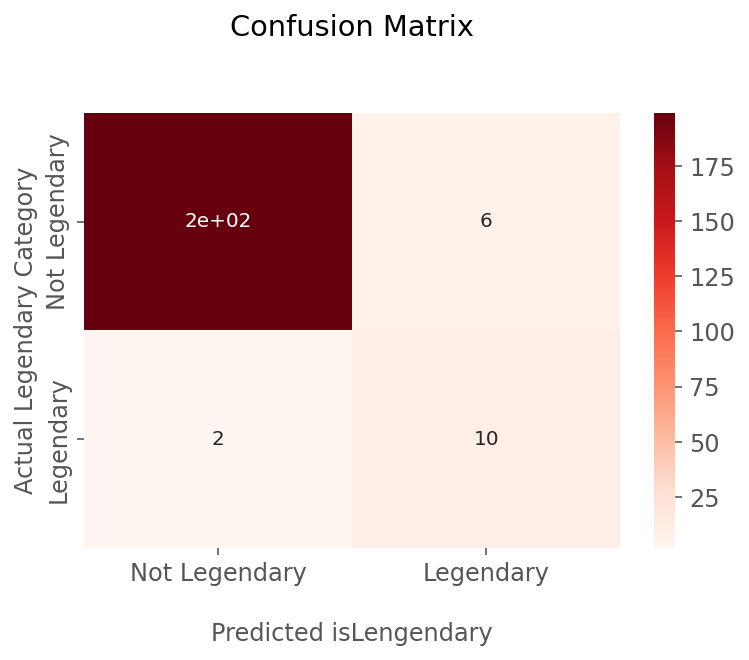

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       205
           1       0.62      0.83      0.71        12

    accuracy                           0.96       217
   macro avg       0.81      0.90      0.85       217
weighted avg       0.97      0.96      0.97       217



----------


In [169]:
from sklearn.linear_model import SGDClassifier
X_train, X_test, y_train, y_test = train_test_split(pokemon_x, pokemon_y, test_size=0.3, random_state=10)
learning_rates = [0.001, 0.003, 0.005, 0.01]
for x in learning_rates:
    sgdc = SGDClassifier(loss="log",max_iter=1000, learning_rate= "constant",eta0 = x)
    print(sgdc)
    sgdc.fit(X_train, y_train)
    score = sgdc.score(X_train, y_train)
    print("Training score: ", score) 
    ypred = sgdc.predict(X_test)
    cm = confusion_matrix(y_test, ypred)
    plot_matrix(cm)
    cr = classification_report(y_test, ypred)
    print(cr+"\n\n")
    print("----------")


## Experimenting with max iteration, solver & penalty on logistic regression:

After experimenting with the max iteration, turns out the solver doesn't converge if the max iteration is anywhere under 190. In addition, when using the default solver lbfgs, the solver doesn't converge even after reaching the max iteration number which is 1000. To solve this a different solver was used, which is newton-cg. To experiment more penalty was added to the model, because the solver is newton-cg, so the only penalty we can use is l2 regularization or no penalty. The model gets an accuracy of 0.98 and a loss of 0.18 with the l2 penalty. When we don't have any penalties in place, the model suffers more of a loss and the accuracy decreases more. 

In [168]:
# for x in range(100,201,10):
#     print(x)
#     clf = LogisticRegression(random_state=0,max_iter= x, solver='newton-cg')
#     clf = clf.fit(X_train, y_train)
#     score = clf.score(X_test, y_test)
#     print("The accuracy of Logistic Regression:", score)
#     error = 1 - score
#     print("The error:", error)

#With Penalty:
print("With Penalty: ")
clf = LogisticRegression(random_state=0,max_iter= 190, solver='newton-cg')
clf = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("The accuracy of Logistic Regression:", score)
ypred = sgdc.predict(X_test)
error = 1 - score
print("The error:", error)
# classification_report(y_test, ypred)

#Without Penalty:
print("Without Penalty: ")
clf = LogisticRegression(random_state=0,max_iter= 190, solver='newton-cg', penalty= 'none')
clf = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("The accuracy of Logistic Regression:", score)
ypred = sgdc.predict(X_test)
error = 1 - score
print("The error:", error)
# classification_report(y_test, ypred)

With Penalty: 
The accuracy of Logistic Regression: 0.9815668202764977
The error: 0.018433179723502335
Without Penalty: 
The accuracy of Logistic Regression: 0.9769585253456221
The error: 0.02304147465437789


1.Gradient descent we the whole test data at each step to calculate the gradient. With each step it gets closer to the optimal result.

2.Stochastic gradient descent doesn't use the whole data instead it uses sampels of the data either randomly or uses the samples once only. It helps in speeding up the process.

3.Mini batch merges between both techniques.

It is not possible to change the batch size using sklearn. The only thing you can do is use partial_fit method, whih takes in the data in different samples but it only updates per sample. Which isn't really using differnt batch sizes.